In [6]:
import pandas as pd
import numpy as np

In [74]:
#commerce_date 불러오기

sampled_products = pd.read_csv("./sampled_products.csv")
sampled_users = pd.read_csv("./sampled_users.csv")
sampled_events = pd.read_csv("./sampled_events.csv")

In [102]:
#merge

df = pd.merge(sampled_users, sampled_events , left_on = 'user_no' , right_on = 'user_no', how = 'inner')
df = pd.merge(df, sampled_products, left_on = 'item_no' , right_on = 'item_no', how = 'inner')

In [3]:
# 결측치 확인

df.isnull().sum()

user_no                           0
birth_date                   296901
gender                       664253
session_id                        0
event_timestamp                   0
event_name                        0
item_no                           0
device_type                       0
mobile_brand_name              3594
mobile_model_name              3594
mobile_marketing_name       4250941
operating_system_version          0
country                          12
region                         2195
platform                          0
item_name                         0
image_name                        0
price                             0
category1_code                    0
category1_name                    0
category2_code                    0
category2_name                    0
category3_code                    0
category3_name                    0
brand_no                        171
brand_name                      209
dtype: int64

In [103]:
#필요없는 columns 제거

df.drop(['session_id','item_no','device_type','operating_system_version',
              'image_name','category1_code','category2_code','category3_code',
              'brand_no','platform','mobile_brand_name','mobile_model_name',
              'mobile_marketing_name'], axis = 1, inplace =True)

In [ ]:
df = df.drop(['session_id','item_no','device_type','operating_system_version',
              'image_name','category1_code','category2_code','category3_code',
              'brand_no','platform','mobile_brand_name','mobile_model_name',
              'mobile_marketing_name','country', 'region'], axis = 1, inplace =True)

In [104]:
#결측치 제거
df.dropna(inplace = True)

In [105]:
# sample_users 전처리
# commerce의 나이대를 파악하기 위해 생년월일의 년도를 사용하여 나이를 파악
# birth_date column에 생년원일이 8888년생 9999년생이 존재하여 datetime 형태로 전환 불가


# 8888년생 9999년생 확인
# df[df['birth_date'].str.contains('8888')]
# df[df['birth_date'].str.contains('9999')]

# 생년월일의 년도만 가져오기
df['age'] = df['birth_date'].str[:4]

# 년도가 8888, 9999 가 아닌 데이터만 가져오기
user_88 = df[df['age'] != '8888']
df = user_88[user_88['age'] != '9999']

# 년도를 숫자형으로 전환후 나이구하기
df['age'] = df['age'].astype(int)
df['age'] = df['age'].apply(lambda x : 2021 - x + 1)

C:\Users\user\AppData\Local\Temp/ipykernel_31824/1573810408.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)
C:\Users\user\AppData\Local\Temp/ipykernel_31824/1573810408.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].apply(lambda x : 2021 - x + 1)


In [106]:
# 나이대 구하기

L = []
for i in df['age']:
    if  i >= 10 and i < 20:
        i = '10대'
        L.append(i)
    elif i >= 20 and i < 30:
        i = '20대'
        L.append(i)
    elif i >= 30 and i < 40:
        i = '30대'
        L.append(i)
    elif i >= 40 and i < 50:
        i = '40대'
        L.append(i)
    elif i >= 50 and i < 60:
        i = '50대'
        L.append(i)
    elif i >= 60  and i < 70:
        i = '60대'
        L.append(i)
    else:
        i = '기타'
        L.append(i)
        
df['age'] = L

C:\Users\user\AppData\Local\Temp/ipykernel_31824/2042412591.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = L


In [107]:
# 10 ~ 60대 까지 분석을 하기위해 기타에 해당하는 나이는 제거
df = df[df['age'] != '기타']

In [108]:
# 이벤트 column 형 변환<datetime>
df['event_timestamp'] = df['event_timestamp'].astype('datetime64')

In [109]:
# 이벤트 column 형 변환<datetime>
df['event_timestamp'] = df['event_timestamp'].astype('datetime64')

# 월별, 요일별, 시간별 column 추가
df['event_time_month'] = df['event_timestamp'].dt.month
df['event_time_weekday'] = df['event_timestamp'].dt.dayofweek
df['event_time_hour'] = df['event_timestamp'].dt.hour
df['event_time_day'] = df['event_timestamp'].dt.day

# 요일별 데이터 문자형 변환
L = []
for i in df['event_time_weekday']:
    if i == 0:
        L.append('월요일')
    elif i == 1:
        L.append('화요일')
    elif i == 2:
        L.append('수요일')
    elif i == 3:
        L.append('목요일')
    elif i == 4:
        L.append('금요일')
    elif i == 5:
        L.append('토요일')
    else:
        L.append('일요일')

#  요일 column 변경
df['event_time_weekday'] = L

# 날짜 상세 표시
df['event_time_month'] = df['event_time_month'].astype('str').apply(lambda x : x + '월')
df['event_time_hour'] = df['event_time_hour'].astype('str').apply(lambda x : x + '시')
df['event_time_day'] = df['event_time_day'].astype('str').apply(lambda x : x + '일')

In [110]:
# 생년월일 column 삭제
df.drop('birth_date', axis = 1, inplace = True)

In [111]:
df = df[((df['category2_name'] != '가방') &
(df['category2_name'] != '신발') &
(df['category2_name'] != '주방용품') &
(df['category2_name'] != '인테리어소품') &
(df['category2_name'] != '주얼리') &
(df['category2_name'] != '가공식품') &
(df['category2_name'] != '패션소품') &
(df['category2_name'] != '휴대폰 악세서리') &
(df['category2_name'] != '침실가구') &
(df['category2_name'] != '침구단품') &
(df['category2_name'] != '문구/사무용품') &
(df['category2_name'] != '뷰티소품') &
(df['category1_name'] == '의류')) |
((df['category2_name'] != '상의') &
(df['category2_name'] != '언더웨어') &
(df['category2_name'] != '이미용가전') &
(df['category2_name'] != '아우터') &
(df['category2_name'] != '주방용품') &
(df['category2_name'] != '홈데코') &
(df['category2_name'] != '하의') &
(df['category2_name'] != '헬스') &
(df['category2_name'] != '헤어케어') &
(df['category2_name'] != '침구단품') &
(df['category1_name'] == '잡화')) |
((df['category2_name'] != '상의') &
(df['category2_name'] != '신발') &
(df['category2_name'] != '가방') &
(df['category2_name'] != '캠핑') &
(df['category2_name'] != '침구단품') &
(df['category2_name'] != '하의') &
(df['category2_name'] != '침실가구') &
(df['category2_name'] != '저장장치') &
(df['category2_name'] != '캠핌') &
(df['category2_name'] != '아우터') &
(df['category2_name'] != '주방용품') &
(df['category2_name'] != '공학기기/용품') &
(df['category2_name'] != '원피스/점프수트') &
(df['category2_name'] != '지갑') &
(df['category2_name'] != '양말') &
(df['category2_name'] != '스킨케어') &
(df['category2_name'] != '향수') &
(df['category1_name'] == '디지털/가전')) |
((df['category2_name'] != '가방') &
(df['category2_name'] != '상의') &
(df['category2_name'] != '하의') &
(df['category2_name'] != '이미용가전') &
(df['category2_name'] != '헬스') &
(df['category2_name'] != '주방용품') &
(df['category2_name'] != '주얼리') &
(df['category2_name'] != '아우터') &
(df['category2_name'] != '음료') &
(df['category2_name'] != '휴대폰 악세서리') &
(df['category2_name'] != '노트북 악세서리') &
(df['category2_name'] != '침구단품') &
(df['category2_name'] != '신발') &
(df['category2_name'] != '생활용품') &
(df['category2_name'] != '스포츠웨어') &
(df['category2_name'] != '원피스/점프수트') &
(df['category2_name'] != '지갑') &
(df['category1_name'] == '화장품/미용')) |
((df['category2_name'] != '가방') &
(df['category2_name'] != '상의') &
(df['category2_name'] != '주얼리') &
(df['category2_name'] != '하의') &
(df['category2_name'] != '뷰티소품') &
(df['category2_name'] != '스킨케어') &
(df['category2_name'] != '아우터') &
(df['category2_name'] != '헬스') &
(df['category2_name'] != '침구단품') &
(df['category2_name'] != '신발') &
(df['category2_name'] != '언더웨어') &
(df['category2_name'] != '침구세트') &
(df['category2_name'] != '커튼/블라인드') &
(df['category2_name'] != '욕실용품') &
(df['category2_name'] != '인테리어소품') &
(df['category2_name'] != '마스크/팩') &
(df['category2_name'] != '지갑') &
(df['category2_name'] != '휴대폰 악세서리') &
(df['category1_name'] == '반려동물')) |
((df['category2_name'] != '주방용품') &
(df['category2_name'] != '가방') &
(df['category2_name'] != '양말') &
(df['category2_name'] != '아우터') &
(df['category2_name'] != '컴퓨터/태블릿 주변기기') &
(df['category2_name'] != '주얼리') &
(df['category2_name'] != '신발') &
(df['category2_name'] != '주방가전') &
(df['category2_name'] != '라운지웨어') &
(df['category2_name'] != '하의') &
(df['category2_name'] != '상의') &
(df['category2_name'] != '모자') &
(df['category2_name'] != '헤어케어') &
(df['category2_name'] != '휴대폰 악세서리') &
(df['category2_name'] != '원피스/점프수트') &
(df['category2_name'] != '계절가전') &
(df['category1_name'] == '가구/인테리어')) |
((df['category2_name'] != '언더웨어') &
(df['category2_name'] != '하의') &
(df['category2_name'] != '상의') &
(df['category2_name'] != '휴대폰 악세서리') &
(df['category2_name'] != '원피스/점프수트') &
(df['category2_name'] != '지갑') &
(df['category2_name'] != '신발') &
(df['category2_name'] != '아우터') &
(df['category2_name'] != '침실가구') &
(df['category2_name'] != '생활가전') &
(df['category2_name'] != '주얼리') &
(df['category2_name'] != '주방용품') &
(df['category2_name'] != '향수') &
(df['category2_name'] != '커튼/블라인드') &
(df['category2_name'] != '모자') &
(df['category2_name'] != '수납가구') &
(df['category2_name'] != '인테리어소품') &
(df['category2_name'] != '패션소품') &
(df['category2_name'] != '가방') &
(df['category2_name'] != '베이스메이크업') &
(df['category2_name'] != '이미용가전') &
(df['category1_name'] == '컬처')) |
((df['category2_name'] != '문구/사무용품') &
(df['category2_name'] != '신발') &
(df['category2_name'] != '가방') &
(df['category2_name'] != '인테리어소품') &
(df['category2_name'] != '침구단품') &
(df['category2_name'] != '하의') &
(df['category2_name'] != '도서, 음반') &
(df['category2_name'] != '언더웨어') &
(df['category2_name'] != '아우터') &
(df['category2_name'] != '스윔웨어') &
(df['category2_name'] != '상의') &
(df['category2_name'] != '휴대폰 악세서리') &
(df['category2_name'] != '주얼리') &
(df['category2_name'] != '의류/잡화') &
(df['category1_name'] == '생활/건강')) |
((df['category2_name'] != '스윔웨어') &
(df['category2_name'] != '라운지웨어') &
(df['category2_name'] != '상의') &
(df['category2_name'] != '생활용품') &
(df['category2_name'] != '서재/사무용가구') &
(df['category2_name'] != '신발') &
(df['category2_name'] != '아우터') &
(df['category2_name'] != '원피스/점프수트') &
(df['category2_name'] != '주얼리') &
(df['category2_name'] != '카페트/러그') &
(df['category2_name'] != '하의') &
(df['category2_name'] != '지갑') &
(df['category2_name'] != '가방') &
(df['category2_name'] != '헤어케어') &
(df['category2_name'] != '침구단품') &
(df['category2_name'] != '선케어') &
(df['category2_name'] != '주방용품') &
(df['category2_name'] != '생활가전') &
(df['category1_name'] == '식품')) |
((df['category2_name'] != '스윔웨어') &
(df['category2_name'] != '지갑') &
(df['category2_name'] != '가방') &
(df['category2_name'] != '헤어케어') &
(df['category2_name'] != '침구단품') &
(df['category2_name'] != '선케어') &
(df['category2_name'] != '주방용품') &
(df['category2_name'] != '생활가전') &
 (df['category2_name'] != '주얼리') &
(df['category1_name'] == '키즈')) |
((df['category2_name'] != '가방') &
(df['category2_name'] != '테크/가젯') &
(df['category2_name'] != '상의') &
(df['category2_name'] != '스킨케어') &
(df['category2_name'] != '침구세트') &
(df['category2_name'] != '휴대폰 악세서리') &
(df['category2_name'] != '커튼/블라인드') &
(df['category2_name'] != '신발') &
(df['category2_name'] != '주방용품') &
(df['category2_name'] != '건강측정용품') &
(df['category2_name'] != '아우터') &
(df['category2_name'] != '클렌징') &
(df['category2_name'] != '주방가전') &
(df['category2_name'] != '생활용품') &
(df['category1_name'] == '스포츠/레저'))]

In [114]:
# 한국 지역 확인
# df[df['country']== 'South Korea']['region'].unique()

# 대한민국 지역 한글로 변경

L = []
for i in df['region']:
    if i == 'Gyeongsangnam-do':
        L.append('경상남도')
    elif i == 'Gyeonggi-do':
        L.append('경기도')
    elif i == 'Seoul':
        L.append('서울특별시')
    elif i == 'Busan':
        L.append('부산광역시')
    elif i == 'Gyeongsangbuk-do':
        L.append('경상북도')
    elif i == 'Incheon':
        L.append('인천광역시')
    elif i == 'Daegu':
        L.append('대구광역시')
    elif i == 'Gangwon-do':
        L.append('강원도')
    elif i == 'Jeollabuk-do':
        L.append('전라북도')
    elif i == 'Ulsan':
        L.append('울산광역시')
    elif i == 'Gwangju':
        L.append('광주광역시')
    elif i == 'Chungcheongbuk-do':
        L.append('충청북도')
    elif i == 'Daejeon':
        L.append('대전광역시')
    elif i == 'Jeju-do':
        L.append('제주도')
    elif i == 'Chungcheongnam-do':
        L.append('충청남도')
    elif i == 'Jeollanam-do':
        L.append('전라남도')
    else:
        L.append('i')

df['region'] = L

In [115]:
df

,user_no,gender,event_timestamp,event_name,country,region,item_name,price,category1_name,category2_name,category3_name,brand_name,age,event_time_month,event_time_weekday,event_time_hour,event_time_day
0,++MXKfwkOw4VFn9HkVCRrw==,F,2021-07-11 12:54:43.707039,click_item,South Korea,경상남도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,20대,7월,일요일,12시,11일
1,+IJWJBuH72jPY+6LfW0uDQ==,F,2021-06-27 01:59:24.362031,click_item,South Korea,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,6월,일요일,1시,27일
2,0qCU5nR0Yp64hIYbtahADQ==,F,2021-06-24 17:51:48.031004,click_item,South Korea,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,6월,목요일,17시,24일
3,0qCU5nR0Yp64hIYbtahADQ==,F,2021-06-24 17:51:48.031004,click_item,South Korea,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,6월,목요일,17시,24일
4,0u77zDKAi3S88XuFzXv7Qw==,F,2021-07-11 10:03:32.919019,click_item,South Korea,서울특별시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,40대,7월,일요일,10시,11일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116069,zxJeR7ZbbTSRzhCxlkd4ug==,F,2021-08-03 11:36:01.103016,click_item,South Korea,경기도,2 STRAP PRINT CHAMBRAY MIX DRESS,233700.0,의류,원피스/점프수트,원피스,Merens,20대,8월,화요일,11시,3일
5116070,zygWFtOw4IuHCzuQzNqjBg==,F,2021-06-20 00:03:18.518020,click_item,South Korea,부산광역시,[handmade]momo knit bucket_black,55000.0,잡화,모자,버킷햇,EVANCE,30대,6월,일요일,0시,20일
5116071,zygWFtOw4IuHCzuQzNqjBg==,F,2021-06-20 00:03:39.935031,click_item,South Korea,부산광역시,[슈펜] 울 니트 버킷햇 TPCW20W12,25900.0,잡화,모자,버킷햇,shoopen,30대,6월,일요일,0시,20일
5116072,zzQb08qbNg8VZ+c3wMVhuw==,F,2021-07-29 12:56:49.857068,click_item,South Korea,서울특별시,캐시미어 혼방 심플 스웨터 ZPZ4ER1902LBL,178000.0,의류,상의,니트/스웨터,OLZEN,50대,7월,목요일,12시,29일


In [117]:
# coutry column 삭제
df.drop('country' , axis = 1 , inplace = True)

# 빈도 분석

In [41]:
pd
import numpy as np

In [43]:
df = pd.read_csv('./29cm_전처리_최종.csv')

In [44]:
df.head()

,user_no,gender,event_timestamp,event_name,region,item_name,price,category1_name,category2_name,category3_name,brand_name,age,event_time_month,event_time_weekday,event_time_hour,event_time_day
0,++MXKfwkOw4VFn9HkVCRrw==,F,2021-07-11 12:54:43.707039,click_item,경상남도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,20대,7월,일요일,12시,11일
1,+IJWJBuH72jPY+6LfW0uDQ==,F,2021-06-27 01:59:24.362031,click_item,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,6월,일요일,1시,27일
2,0qCU5nR0Yp64hIYbtahADQ==,F,2021-06-24 17:51:48.031004,click_item,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,6월,목요일,17시,24일
3,0qCU5nR0Yp64hIYbtahADQ==,F,2021-06-24 17:51:48.031004,click_item,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,6월,목요일,17시,24일
4,0u77zDKAi3S88XuFzXv7Qw==,F,2021-07-11 10:03:32.919019,click_item,서울특별시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,40대,7월,일요일,10시,11일


In [45]:
df_clothing = df[df['category1_name'] == '의류']
df_stuff = df[df['category1_name'] == '잡화']
df_digital = df[df['category1_name'] == '디지털/가전']
df_beauty = df[df['category1_name'] == '화장품/미용']
df_pet = df[df['category1_name'] == '반려동물']
df_furniture = df[df['category1_name'] == '가구/인테리어']
df_culture = df[df['category1_name'] == '컬처']
df_life = df[df['category1_name'] == '생활/건강']
df_sports = df[df['category1_name'] == '스포츠/레저']
df_food = df[df['category1_name'] == '식품']
df_kids = df[df['category1_name'] == '키즈']


In [47]:
# 성별, 연령별 카테고리별 29cm의 click 수 빈도수 비교 분석
# 29cm의 고객들은 어떤 카테고리의 관심을 가졌나??

click = df[df['event_name'] == 'click_item']

pd.crosstab(index = [click.gender, click.age] , columns =  click.category1_name)

category1_name  가구/인테리어  디지털/가전  반려동물  생활/건강  스포츠/레저    식품      의류      잡화  \
gender age                                                                   
F      10대          606     891    45    415      55    66   10670    5527   
       20대        41844   34653  2122  42229    4561  5925  810389  408791   
       30대        59484   28543  2455  59414    9400  8648  917362  348214   
       40대        24112    8368   901  24901    4643  4961  384647  126093   
       50대         5242    1476   145   5276     623   950   78469   24423   
       60대          416     260    31    644      66    94   12017    3570   
M      10대           66     151     2     64      35    41    4758    1104   
       20대         3527    5120    67   3260    1513   873  203874   56545   
       30대         5813    6116   154   5314    3873  1240  186417   55417   
       40대         2166    2310    27   2310    1825   626   61176   22878   
       50대          443     340     6    362     189   119    7221    3658   
       60대          500     114     3    413      76    60    2590    1144   

category1_name    컬처    키즈  화장품/미용  
gender age                          
F      10대       286    42     348  
       20대      4825  2089   13788  
       30대      4126  2496   15265  
       40대      1396  1209    6508  
       50대       306    88     855  
       60대        48    45     160  
M      10대        41     5      61  
       20대       586   270    1997  
       30대       481   342    1902  
       40대       169   170     593  
       50대        35    19     153  
       60대        28    15      36

In [48]:
# 29cm의 고객들의 소비는 어떠할까??

purchase = df[df['event_name'] == 'purchase_success']

pd.crosstab(index = [purchase.gender, purchase.age] , columns =  purchase.category1_name)

category1_name  가구/인테리어  디지털/가전  반려동물  생활/건강  스포츠/레저    식품     의류     잡화  \
gender age                                                                 
F      10대           39     107     8     21       9    15    801    474   
       20대         4150    5068   427   6318     711  1564  55217  36008   
       30대         6709    4878   489  10781    1570  2780  66660  33146   
       40대         2729    1580   198   4863     784  1631  26504  11519   
       50대          563     359    29   1101     114   334   4903   2115   
       60대           81      59     5    104      23    38    868    354   
M      10대           16      48     0     25       5     8    577    184   
       20대          647    1213    21    878     298   289  20900   6851   
       30대         1147    1652    52   1863     850   637  20837   6886   
       40대          401     602    10    561     429   331   6405   2630   
       50대          109     100     3    124      54    72    702    429   
       60대           24      15     0     24      17    24    255    111   

category1_name    컬처   키즈  화장품/미용  
gender age                         
F      10대       106    3     126  
       20대      3656  111    3905  
       30대      3158  274    4491  
       40대       862  130    1965  
       50대       151    2     343  
       60대        13    1      66  
M      10대        12    1      37  
       20대       584   18    1107  
       30대       578   38     966  
       40대       151   29     346  
       50대        22    6      55  
       60대         9    0      15

In [49]:
# 29cm 성별 , 연령별, 카테고리별 매출 분석

sales = df[df['event_name'] == 'purchase_success']

pd.crosstab(index = [sales.gender, sales.age] , columns =  sales.category1_name, values = sales.price , aggfunc= sum)

category1_name      가구/인테리어       디지털/가전        반려동물        생활/건강      스포츠/레저  \
gender age                                                                      
F      10대         838180.0    2749100.0    173500.0     475880.0    134900.0   
       20대      172464320.0  251077470.0  13037200.0  135546640.0  25605300.0   
       30대      329128810.0  322666420.0  15951200.0  250589010.0  69841500.0   
       40대      154357640.0  109299110.0   7368800.0  116791060.0  36097190.0   
       50대       24364250.0   28506000.0    992900.0   27585540.0   5204900.0   
       60대        5456900.0   10835800.0    181000.0    3008180.0    732100.0   
M      10대         382900.0    3348600.0         NaN     624700.0    165750.0   
       20대       28842800.0   79673800.0    757600.0   19582980.0  11433600.0   
       30대       61383030.0  176432190.0   1457500.0   47485600.0  43449800.0   
       40대       26375800.0   73736790.0    322900.0   15406120.0  21023300.0   
       50대        5113700.0   11771100.0     91800.0    2910140.0   2074600.0   
       60대        2045600.0    1078900.0         NaN     825040.0    419200.0   

category1_name          식품            의류            잡화          컬처  \
gender age                                                           
F      10대        417500.0  4.254846e+07  1.923010e+07   1384700.0   
       20대      36910010.0  3.601006e+09  2.388960e+09  45932600.0   
       30대      68484810.0  4.864139e+09  2.147762e+09  42118300.0   
       40대      35931440.0  1.993455e+09  6.965204e+08  11240700.0   
       50대       6187480.0  3.635905e+08  1.413432e+08   1869900.0   
       60대       1008140.0  6.178912e+07  2.180423e+07    211100.0   
M      10대        212780.0  3.385240e+07  1.227993e+07    170800.0   
       20대       6267030.0  1.347967e+09  5.554663e+08   7350100.0   
       30대      13460360.0  1.367658e+09  5.544514e+08   8589500.0   
       40대       6542310.0  3.956929e+08  1.766464e+08   2717600.0   
       50대       2506940.0  5.076606e+07  3.267410e+07    349900.0   
       60대        556720.0  1.696680e+07  6.858300e+06    132500.0   

category1_name          키즈       화장품/미용  
gender age                               
F      10대        178800.0    2334290.0  
       20대       4607700.0   82673790.0  
       30대      12544300.0  106893400.0  
       40대       5738700.0   47646860.0  
       50대         79800.0    8656280.0  
       60대         21000.0    1383670.0  
M      10대         39900.0     645500.0  
       20대        903500.0   21576970.0  
       30대       1651300.0   21555940.0  
       40대       1193800.0    7775790.0  
       50대        247000.0    1151720.0  
       60대             NaN     290600.0

In [51]:
# 연령, 성별 매출 비교

pd.crosstab(sales.gender, sales.age ,values = sales.price , aggfunc= sum)

age,10대,20대,30대,40대,50대,60대
gender,,,,,,
F,70465409.0,6.757820e+09,8.230119e+09,3.214447e+09,608380730.0,106431245.0
M,51723260.0,2.079821e+09,2.297575e+09,7.274337e+08,109657060.0,29173660.0


In [52]:
# 연령 , 성별 전환율 (CTR)

stuff = df[df['category1_name'] == '잡화']
stuff = stuff[(stuff['event_name'] == 'click_item') | (stuff['event_name'] == 'purchase_success')]

stuff = pd.crosstab(index = [stuff.gender, stuff.age] ,
            columns =  stuff.event_name
           )

stuff['click_purchase_rate'] = round(stuff['purchase_success'] / stuff['click_item'],2)
stuff

event_name  click_item  purchase_success  click_purchase_rate
gender age                                                   
F      10대        5527               474                 0.09
       20대      408791             36008                 0.09
       30대      348214             33146                 0.10
       40대      126093             11519                 0.09
       50대       24423              2115                 0.09
       60대        3570               354                 0.10
M      10대        1104               184                 0.17
       20대       56545              6851                 0.12
       30대       55417              6886                 0.12
       40대       22878              2630                 0.11
       50대        3658               429                 0.12
       60대        1144               111                 0.10

In [53]:
digital = df[df['category1_name'] == '디지털/가전']
digital = digital[(digital['event_name'] == 'click_item') | (digital['event_name'] == 'purchase_success')]

digital = pd.crosstab(index = [digital.gender, digital.age] ,
            columns =  digital.event_name
           )

digital['click_purchase_rate'] = round(digital['purchase_success'] / digital['click_item'],2)
digital

event_name  click_item  purchase_success  click_purchase_rate
gender age                                                   
F      10대         891               107                 0.12
       20대       34653              5068                 0.15
       30대       28543              4878                 0.17
       40대        8368              1580                 0.19
       50대        1476               359                 0.24
       60대         260                59                 0.23
M      10대         151                48                 0.32
       20대        5120              1213                 0.24
       30대        6116              1652                 0.27
       40대        2310               602                 0.26
       50대         340               100                 0.29
       60대         114                15                 0.13

In [54]:
beauty = df[df['category1_name'] == '화장품/미용']
beauty = beauty[(beauty['event_name'] == 'click_item') | (beauty['event_name'] == 'purchase_success')]

beauty = pd.crosstab(index = [beauty.gender, beauty.age] ,
            columns =  beauty.event_name
           )

beauty['click_purchase_rate'] = round(beauty['purchase_success'] / beauty['click_item'],2)
beauty

event_name  click_item  purchase_success  click_purchase_rate
gender age                                                   
F      10대         348               126                 0.36
       20대       13788              3905                 0.28
       30대       15265              4491                 0.29
       40대        6508              1965                 0.30
       50대         855               343                 0.40
       60대         160                66                 0.41
M      10대          61                37                 0.61
       20대        1997              1107                 0.55
       30대        1902               966                 0.51
       40대         593               346                 0.58
       50대         153                55                 0.36
       60대          36                15                 0.42

In [56]:
furniture = df[df['category1_name'] == '가구/인테리어']
furniture = furniture[(furniture['event_name'] == 'click_item') | (furniture['event_name'] == 'purchase_success')]

furniture = pd.crosstab(index = [furniture.gender, furniture.age] ,
            columns =  furniture.event_name
           )

furniture['click_purchase_rate'] = round(furniture['purchase_success'] / furniture['click_item'],2)
furniture

event_name  click_item  purchase_success  click_purchase_rate
gender age                                                   
F      10대         606                39                 0.06
       20대       41844              4150                 0.10
       30대       59484              6709                 0.11
       40대       24112              2729                 0.11
       50대        5242               563                 0.11
       60대         416                81                 0.19
M      10대          66                16                 0.24
       20대        3527               647                 0.18
       30대        5813              1147                 0.20
       40대        2166               401                 0.19
       50대         443               109                 0.25
       60대         500                24                 0.05

In [57]:
culture = df[df['category1_name'] == '컬처']
culture = culture[(culture['event_name'] == 'click_item') | (culture['event_name'] == 'purchase_success')]

culture = pd.crosstab(index = [culture.gender, culture.age] ,
            columns =  culture.event_name
           )

culture['click_purchase_rate'] = round(culture['purchase_success'] / culture['click_item'],2)
culture

event_name  click_item  purchase_success  click_purchase_rate
gender age                                                   
F      10대         286               106                 0.37
       20대        4825              3656                 0.76
       30대        4126              3158                 0.77
       40대        1396               862                 0.62
       50대         306               151                 0.49
       60대          48                13                 0.27
M      10대          41                12                 0.29
       20대         586               584                 1.00
       30대         481               578                 1.20
       40대         169               151                 0.89
       50대          35                22                 0.63
       60대          28                 9                 0.32

In [58]:
food = df[df['category1_name'] == '식품']
food = food[(food['event_name'] == 'click_item') | (food['event_name'] == 'purchase_success')]

food = pd.crosstab(index = [food.gender, food.age] ,
            columns =  food.event_name
           )

food['click_purchase_rate'] = round(food['purchase_success'] / food['click_item'],2)
food

event_name  click_item  purchase_success  click_purchase_rate
gender age                                                   
F      10대          66                15                 0.23
       20대        5925              1564                 0.26
       30대        8648              2780                 0.32
       40대        4961              1631                 0.33
       50대         950               334                 0.35
       60대          94                38                 0.40
M      10대          41                 8                 0.20
       20대         873               289                 0.33
       30대        1240               637                 0.51
       40대         626               331                 0.53
       50대         119                72                 0.61
       60대          60                24                 0.40

In [59]:
# 29cm의 사람들의 활동하는 시간의 빈도
# 29cm의 사람들은 몇시에 많이 클릭, 관심을 보일까?
# 가설 출퇴근 시간에 사람들의 관심이 많을 것이다.

click = df[df['event_name'] == 'click_item']

click = pd.crosstab(index = [click.gender, click.age] , columns =  click.event_time_hour)
click = click[['1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시',
       '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시',
       '21시', '22시', '23시', '0시']]
click

event_time_hour     1시     2시     3시     4시     5시     6시     7시     8시  \
gender age                                                                
F      10대        1209    727    486    230    125     93    228    419   
       20대       79923  51517  31416  17806  11343  11233  19284  35590   
       30대       65259  38492  22633  14032  11953  17246  30017  48932   
       40대       23103  12906   7597   5162   5771   8810  15295  22723   
       50대        4008   2675   1712   1177   1079   2070   3460   4658   
       60대         743    462    401    481    202    265    457    617   
M      10대         413    315    160     80     29     35     96    102   
       20대       17049  10954   7040   4312   2927   2669   4181   6985   
       30대       14710   8415   5102   3096   2807   3311   5704   8651   
       40대        4016   2436   1554    998   1023   1545   2258   3378   
       50대         451    397    262    155    237    349    401    577   
       60대         234    159    156     70     41     83    205    224   

event_time_hour     9시    10시  ...    15시    16시    17시    18시    19시    20시  \
gender age                     ...                                             
F      10대         617    611  ...    912    823    861    815    995   1084   
       20대       41365  50737  ...  59978  57790  55935  56105  63986  77415   
       30대       52735  60090  ...  63728  60464  57919  56244  67925  83916   
       40대       24059  25835  ...  28307  26821  23737  22906  27523  36251   
       50대        5276   5103  ...   6291   5883   5453   4867   5766   7833   
       60대         572    653  ...    940   1011    752    746    846    887   
M      10대         164    210  ...    241    375    287    273    229    375   
       20대        8574  10463  ...  12443  11860  12303  11831  13360  14378   
       30대        8541   9768  ...  10914  10669  10353  10603  11936  14562   
       40대        3576   3358  ...   4304   4128   4031   3321   4413   5759   
       50대         405    462  ...    601    567    473    565    421    863   
       60대         308    244  ...    294    256    203    206    184    192   

event_time_hour     21시     22시     23시      0시  
gender age                                       
F      10대         1172    1642    1604    1264  
       20대        89577  107836  117337  108563  
       30대       104832  124981  130270  105041  
       40대        41811   47252   46573   37611  
       50대         7997    8528    7290    6004  
       60대         1090    1118    1173    1087  
M      10대          355     454     539     566  
       20대        15434   19212   22970   22218  
       30대        17959   22172   24750   21931  
       40대         6948    8701    7701    6442  
       50대          913     945     727     679  
       60대          217     287     312     180  

[12 rows x 24 columns]

In [60]:
# 29cm 연령, 성별, 시간의 구매 빈도
# 언제 구매가 많이 일어났어??

purchase = df[df['event_name'] == 'purchase_success']

purchase = pd.crosstab(index = [purchase.gender, purchase.age] , columns =  purchase.event_time_hour)
purchase = purchase[['1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시',
       '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시',
       '21시', '22시', '23시', '0시']]
purchase

event_time_hour    1시    2시    3시    4시   5시    6시    7시    8시    9시   10시  \
gender age                                                                   
F      10대         68    44    23    20   10     9    21    24    41    49   
       20대       5342  3147  1699  1094  727   740  1508  3004  3660  4874   
       30대       4600  2662  1477   912  782  1208  2440  4418  5631  6603   
       40대       1668   809   445   352  318   631  1198  1788  2635  2821   
       50대        248   148    62   141   57   139   199   384   419   545   
       60대         30    19     9    17   12     8    36    61    48    59   
M      10대         56    30    21     9    5     1    17    29    16    29   
       20대       1614  1024   656   378  212   316   527   811   974  1223   
       30대       1491   832   432   247  206   353   664  1163  1433  1626   
       40대        332   201   168   134   68   135   213   376   577   619   
       50대         59    17    21    19   15    24    28    44    69    91   
       60대          5     7    10    10    1    19    17    11    28    27   

event_time_hour  ...   15시   16시   17시   18시   19시   20시   21시   22시    23시  \
gender age       ...                                                          
F      10대       ...    82    50    72    97    94    99   139   131    159   
       20대       ...  5851  5704  5559  5091  5437  6163  7349  8920   9777   
       30대       ...  6999  6663  5968  5806  5685  7044  8411  9956  10538   
       40대       ...  2904  2855  2596  2004  2282  2813  3204  3501   3883   
       50대       ...   510   544   511   462   479   455   769   649    634   
       60대       ...   105    82    72    69    80    78   101   118     97   
M      10대       ...    32    49    52    42    54    36    71    54     72   
       20대       ...  1742  1684  1521  1540  1562  1573  1783  2264   2469   
       30대       ...  1936  1727  1610  1513  1455  1694  2145  2737   2884   
       40대       ...   681   677   603   515   474   577   825   880    810   
       50대       ...    91    74    96    85   105    68   117   137    118   
       60대       ...    46    39    14    11     8    24    18    24     29   

event_time_hour    0시  
gender age             
F      10대        125  
       20대       7663  
       30대       8029  
       40대       2695  
       50대        371  
       60대        119  
M      10대         77  
       20대       2254  
       30대       2145  
       40대        634  
       50대         91  
       60대         12  

[12 rows x 24 columns]

In [61]:
# 29cm 연령, 성별, 요일별 빈도
# 29cm의 어떤 요일에 관심이 많을까?

click = df[df['event_name'] == 'click_item']

click = pd.crosstab(index = [click.gender, click.age] , columns =  click.event_time_weekday)
click = click[['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']]
click

event_time_weekday     월요일     화요일     수요일     목요일     금요일     토요일     일요일
gender age                                                                
F      10대            2558    2698    2300    2821    2379    2921    3274
       20대          200718  204506  191396  181095  174005  196113  223383
       30대          201028  208909  202251  192226  185770  217210  248013
       40대           76983   83073   79462   77971   79378   93195   97677
       50대           15500   16030   17188   14817   16668   18901   18749
       60대            2268    3007    2464    2032    2853    2149    2578
M      10대             943     886     804     875     875    1049     896
       20대           40370   43842   39524   37500   36844   37643   41909
       30대           37435   41426   37931   35763   35500   36837   42177
       40대           12200   13257   13020   12055   12633   15091   15994
       50대            1425    1794    1708    1795    1728    2080    2015
       60대             719     998     672     719     520     683     668

In [62]:
purchase = df[df['event_name'] == 'purchase_success']

purchase = pd.crosstab(index = [purchase.gender, purchase.age] , columns =  purchase.event_time_weekday)
purchase = purchase[['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']]
purchase

event_time_weekday    월요일    화요일    수요일    목요일    금요일    토요일    일요일
gender age                                                         
F      10대            280    262    222    172    214    241    318
       20대          18368  18809  16765  16524  14738  13530  18401
       30대          20712  21619  20010  19609  16412  15764  20810
       40대           7519   8145   7961   7745   6565   6488   8342
       50대           1365   1400   1373   1451   1456   1345   1624
       60대            229    263    214    232    221    166    287
M      10대            131    130    120    132    133    117    150
       20대           5243   5637   4765   4912   4091   3585   4573
       30대           5436   5891   5324   5469   4257   3938   5191
       40대           1724   1603   1906   1681   1556   1509   1916
       50대            182    231    252    260    201    253    297
       60대             62     47     76    115     64     50     80

In [63]:
purchase = df[df['event_name'] == 'purchase_success']

purchase = pd.crosstab(index = [purchase.gender, purchase.age] ,
                columns =  purchase.event_time_weekday,
               values = purchase.price,
               aggfunc  = sum)
purchase = purchase[['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']]
purchase

event_time_weekday           월요일           화요일           수요일           목요일  \
gender age                                                                   
F      10대          1.084612e+07  1.102542e+07  1.064670e+07  6.998200e+06   
       20대          1.070290e+09  1.057783e+09  9.737094e+08  9.803479e+08   
       30대          1.246575e+09  1.299707e+09  1.237634e+09  1.177458e+09   
       40대          4.433181e+08  4.830088e+08  4.871208e+08  4.700330e+08   
       50대          8.297149e+07  8.620825e+07  8.911306e+07  8.703183e+07   
       60대          1.380470e+07  2.274030e+07  1.524933e+07  1.355127e+07   
M      10대          6.936400e+06  7.965030e+06  6.834380e+06  6.128200e+06   
       20대          3.294180e+08  3.681118e+08  3.027075e+08  2.916535e+08   
       30대          3.449733e+08  3.662041e+08  3.516162e+08  3.513051e+08   
       40대          9.832159e+07  1.000800e+08  1.190740e+08  1.031809e+08   
       50대          1.480716e+07  1.654264e+07  1.551180e+07  1.621360e+07   
       60대          4.173900e+06  2.645300e+06  3.896560e+06  5.899400e+06   

event_time_weekday           금요일          토요일           일요일  
gender age                                                   
F      10대          8.215800e+06    9589590.0  1.314358e+07  
       20대          8.263694e+08  778176520.0  1.071144e+09  
       30대          1.011212e+09  977588893.0  1.279944e+09  
       40대          4.125892e+08  414973490.0  5.034038e+08  
       50대          8.809692e+07   76256030.0  9.870315e+07  
       60대          1.448562e+07    9913200.0  1.668682e+07  
M      10대          8.504850e+06    8059300.0  7.295100e+06  
       20대          2.601678e+08  231284890.0  2.964778e+08  
       30대          2.976978e+08  259450410.0  3.263278e+08  
       40대          1.000627e+08   91719610.0  1.149949e+08  
       50대          1.323564e+07   16669060.0  1.667716e+07  
       60대          3.954700e+06    3301100.0  5.302700e+06

In [64]:
# 의류 세부 카테고리 group by
df_brand = df_clothing.groupby(['category2_name', 'brand_name']).count()['price'].reset_index()
df_brand = df_brand.rename(columns = {'price' :'count'})

# 의류 세부 카테고리별 인기브랜드 top 10
df_brand[df_brand['category2_name'] == '상의'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '하의'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '언더웨어'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '원피스/점프수트'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '라운지웨어'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '스포츠웨어'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '아우터'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '스윔웨어'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '정장'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
1183,상의,Mardi Mercredi,45588
1688,상의,THOMASMORE,43509
240,상의,ANOTHEROFFICE,32023
1309,상의,Nothing written,30356
990,상의,LENINA,26354
1223,상의,NEITHERS,23077
585,상의,DUNST,23049
1089,상의,MARITHE FRANCOIS GIRBAUD,22638
1774,상의,URAGO,20641
659,상의,FACADE PATTERN,17838


In [65]:
# 29cm 하의 인기 브랜드 top 10
df_brand[df_brand['category2_name'] == '하의'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
5437,하의,FACADE PATTERN,31528
5109,하의,ANOTHEROFFICE,17633
6248,하의,THOMASMORE,15117
5694,하의,LE,15039
6306,하의,URAGO,14423
5373,하의,DUNST,14133
5196,하의,BLUE BRICK,12443
5949,하의,Nothing written,12045
5526,하의,GROVE,11793
5724,하의,LOEIL,11088


In [66]:
# 29cm 언더웨어 인기 브랜드 top 10
# 29cm 언더웨어는 comfortlab(여성 속옷 브랜드)이 인기가 있다.
df_brand[df_brand['category2_name'] == '언더웨어'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
4141,언더웨어,comfortlab,31596
4154,언더웨어,vivevive,12580
4145,언더웨어,inA,11889
4142,언더웨어,eau clair,9661
4086,언더웨어,GUESS UNDERWEAR,5438
4140,언더웨어,codescombineinner,4140
4116,언더웨어,SEKANSKEEN,2688
4126,언더웨어,Taxte,2342
4148,언더웨어,nareun,2039
4077,언더웨어,ELLE INNERWEAR,1820


In [67]:
# 29cm 원피스/점프수트 인기 브랜드 top 10
# 원피스/ 점프수트는 MONGDOL이 인기가 있다.
df_brand[df_brand['category2_name'] == '원피스/점프수트'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
4461,원피스/점프수트,LENINA,25227
4524,원피스/점프수트,MONGDOL,22839
4377,원피스/점프수트,HAE BY HAEKIM,16283
4455,원피스/점프수트,LE,10204
4300,원피스/점프수트,DUNST,9142
4433,원피스/점프수트,KINDERSALMON,8912
4971,원피스/점프수트,앳코너,8864
4271,원피스/점프수트,COVETBLAN,8202
4324,원피스/점프수트,ETMON,7906
4936,원피스/점프수트,springcrocus,7874


In [68]:
# 라운지 웨어는 호텔, 공항의 라운지 처럼 휴식을 취하는 공간에서 입는 옷
# 29cm 라운지 웨어 인기브랜드 top 10
# 29cm 라운지 웨어는 Jo's lounge 가 인기가 많다.
df_brand[df_brand['category2_name'] == '라운지웨어'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
35,라운지웨어,Jo's lounge,47135
70,라운지웨어,ULLALA PAJAMA,24804
37,라운지웨어,KOZNOK,3363
85,라운지웨어,eau clair,3178
109,라운지웨어,비컴포트,2020
94,라운지웨어,inAROOM,1577
23,라운지웨어,Frankly Sleeping,1397
63,라운지웨어,Snappy Cuddle,936
6,라운지웨어,BALCONY,810
54,라운지웨어,Pause Please,735


In [69]:
# 29cm 스포츠웨어 top 10
# 29cm 스포츠 웨어는 deviwear, movewarm가 인기가 많다.
df_brand[df_brand['category2_name'] == '스포츠웨어'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
2619,스포츠웨어,movewarm,17257
2610,스포츠웨어,deviwear,13111
2638,스포츠웨어,스위브_건원,3444
2636,스포츠웨어,브리피스,3298
2632,스포츠웨어,레이나모라,2840
2552,스포츠웨어,NIKE_그룹리츠,1384
2556,스포츠웨어,NIKE_주식회사 올아이원트,1307
2540,스포츠웨어,Loweight,848
2640,스포츠웨어,씨엘코코,725
2645,스포츠웨어,인지액티브,716


In [70]:
# 29cm 아우터 인기 브랜드 top 10
df_brand[df_brand['category2_name'] == '아우터'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
3796,아우터,avamolli,4899
2954,아우터,DUNST,4579
2724,아우터,ANOTHEROFFICE,4036
3221,아우터,LOEUVRE RTW,2775
3723,아우터,VPPLEMENT,2774
3070,아우터,GROVE,2425
3782,아우터,ahwe,2033
4043,아우터,앳코너,2022
3007,아우터,FACADE PATTERN,2013
3227,아우터,LOOKAST,1972


In [71]:
# 29cm 스윔웨어 인기 브랜드 top 10
df_brand[df_brand['category2_name'] == '스윔웨어'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
2447,스윔웨어,SURFEA,10367
2391,스윔웨어,CORALIQUE,8041
2432,스윔웨어,PLAGE,5929
2382,스윔웨어,5pening,3362
2394,스윔웨어,DELIGHTPOOL,2527
2411,스윔웨어,LAMEREI,2195
2385,스윔웨어,AGNEL,2124
2440,스윔웨어,SALTY FLOWER,2080
2393,스윔웨어,DAZE DAYZ,2078
2464,스윔웨어,bohemianblue,1546


In [72]:
# 29cm 정장 인기 브랜드 top 10
df_brand[df_brand['category2_name'] == '정장'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
5001,정장,LOEIL,386
4976,정장,24/7 series,381
5011,정장,SUARE,251
4979,정장,AHE,234
4994,정장,Fahrenheit,206
4998,정장,KOLEAT,158
4997,정장,KLEAN,93
5013,정장,UNCOATED-247,83
5000,정장,LEARVE,70
5003,정장,MOAA,53


- kids 카테고리

In [75]:
# 키즈 세부 카테고리 group by
df_brand = df_kids.groupby(['category2_name', 'brand_name']).count()['price'].reset_index()
df_brand = df_brand.rename(columns = {'price' :'count'})

# 키즈 세부 카테고리별 인기브랜드 top 10
df_brand[df_brand['category2_name'] == '신발'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '양말'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '상의'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '스포츠웨어'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '모자'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '아우터'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '하의'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '홈웨어'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '원피스'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
58,신발,Crocs_한아,1866
71,신발,VICTORIA SHOES,1172
56,신발,CROCS_이랜드,756
55,신발,BIRKENSTOCK_브랑토리,622
66,신발,RAINBOW SANDALS,464
53,신발,AVARCA PONS,460
67,신발,ROCKSPRING,249
72,신발,colemanshoes,79
60,신발,Keds,73
68,신발,Rockfish Weatherwear,66


In [76]:
df_brand[df_brand['category2_name'] == '양말'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
83,양말,Dailylike,199
85,양말,PANTONE SOCKS,59
86,양말,blank03,17
81,양말,Abiruz,8
87,양말,shoopen,4
84,양말,NBA KIDS,3
82,양말,Bonjour March,1
88,양말,호텔 해쉬 블랙,1


In [77]:
df_brand[df_brand['category2_name'] == '상의'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
40,상의,royalcitypark,388
28,상의,SAINT JAMES,185
11,상의,BLANK ROOM,147
35,상의,brownbreath,74
16,상의,FREI,66
42,상의,율그란,55
26,상의,NOCLAIM,29
21,상의,Keds,26
24,상의,NBA KIDS,23
25,상의,NIKE_비비엘유이,22


In [78]:
df_brand[df_brand['category2_name'] == '스포츠웨어'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
48,스포츠웨어,UNDERARMOR_비비엘유이,46
47,스포츠웨어,NIKE_비비엘유이,26
46,스포츠웨어,NBA KIDS,19
43,스포츠웨어,ADIDAS_비비엘유이,11
49,스포츠웨어,nike_한아,4
45,스포츠웨어,GBH,3
44,스포츠웨어,DAZE DAYZ,1


In [79]:
df_brand[df_brand['category2_name'] == '모자'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
2,모자,NBA KIDS,36
0,모자,Harding-Lane,31
4,모자,WOOALONG,9
3,모자,STEREO VINYLS,3
1,모자,Laulhere,2
5,모자,brownbreath,2
6,모자,율그란,2


In [80]:
df_brand[df_brand['category2_name'] == '아우터'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
79,아우터,ZIOZIA,34
77,아우터,GBH,17
76,아우터,CP COMPANY_에스엠케이,5
75,아우터,ADIDAS_비비엘유이,2
78,아우터,MONCLER_에스엠케이,1
80,아우터,율그란,1


In [81]:
df_brand[df_brand['category2_name'] == '하의'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
98,하의,FREI,81
101,하의,Mardi Mercredi,22
109,하의,brownbreath,19
96,하의,BRIAN Berry,11
99,하의,GBH,11
102,하의,NBA KIDS,8
111,하의,르 쁘띠 루카스 뒤 테르트르,8
97,하의,DARENIMO,6
100,하의,MOONTAN,5
106,하의,TAZE,5


In [82]:
df_brand[df_brand['category2_name'] == '홈웨어'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
113,홈웨어,ECHOND,101
118,홈웨어,소소모소,28
114,홈웨어,NBA KIDS,8
119,홈웨어,스윙앤슬라이드,6
120,홈웨어,아노락,5
112,홈웨어,ADD Robe,1
115,홈웨어,hugplus,1
116,홈웨어,굿나잇데이브,1
117,홈웨어,르 쁘띠 루카스 뒤 테르트르,1


In [83]:
df_brand[df_brand['category2_name'] == '원피스'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
89,원피스,Andersson Bell for women,14
93,원피스,SEKANSKEEN,12
95,원피스,르 쁘띠 루카스 뒤 테르트르,11
91,원피스,MATT AND MEL,10
90,원피스,GBH,8
94,원피스,STUDIO FORREST,6
92,원피스,NBA KIDS,5


- 반려동물

In [84]:
# 카테고리별 인기 브랜드
# 반려동물 세부 카테고리 group by
df_brand = df_pet.groupby(['category2_name', 'brand_name']).count()['price'].reset_index()
df_brand = df_brand.rename(columns = {'price' :'count'})

# 반려동물 세부 카테고리별 인기브랜드 top 10
df_brand[df_brand['category2_name'] == '강아지 용품'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '의류/잡화	'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '고양이 용품'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '헤어케어'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '건강측정용품'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
59,강아지 용품,베이컨,580
71,강아지 용품,아르르,521
23,강아지 용품,Pidan Studio,412
14,강아지 용품,HOWLPOT.,210
16,강아지 용품,INHERENT,202
29,강아지 용품,andblank,184
35,강아지 용품,likalika,133
17,강아지 용품,LUFF,120
36,강아지 용품,monchouchou,104
60,강아지 용품,복슬강아지,94


In [85]:
df_brand[df_brand['category2_name'] == '의류/잡화'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
133,의류/잡화,Mardi Mercredi,736
159,의류/잡화,투스투스,414
132,의류/잡화,Keds,402
140,의류/잡화,andblank,224
149,의류/잡화,뮤니쿤트,210
153,의류/잡화,스니프,168
142,의류/잡화,monchouchou,115
130,의류/잡화,HUTS&BAY,110
141,의류/잡화,likalika,83
155,의류/잡화,아르르,75


In [86]:
df_brand[df_brand['category2_name'] == '고양이 용품'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
96,고양이 용품,Pidan Studio,615
95,고양이 용품,PURR,92
101,고양이 용품,WINCO,21
111,고양이 용품,니나오토슨,21
104,고양이 용품,cote,16
112,고양이 용품,도기맨,12
110,고양이 용품,네코이,12
117,고양이 용품,아르르,12
119,고양이 용품,알레시,11
98,고양이 용품,SUCK UK,10


In [87]:
df_brand[df_brand['category2_name'] == '헤어케어'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
163,헤어케어,Deeperence,170


In [88]:
df_brand[df_brand['category2_name'] == '건강측정용품'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
90,건강측정용품,요아이,63


-  생활/건강 카테고리

In [89]:
# 카테고리별 인기 브랜드
# 생활/건강 세부 카테고리 group by
df_brand = df_life.groupby(['category2_name', 'brand_name']).count()['price'].reset_index()
df_brand = df_brand.rename(columns = {'price' :'count'})

# 생활/건강 세부 카테고리별 인기브랜드 top 10
df_brand[df_brand['category2_name'] == '주방용품'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '생활용품'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '욕실용품'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '구강위생용품'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '원예/식물'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '건강측정용품'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
1133,주방용품,앨리건트테이블,14703
929,주방용품,kamomekitchen,11324
1010,주방용품,락앤락,10159
824,주방용품,NICOTT,4343
931,주방용품,marimekko,3706
1190,주방용품,코지테이블,3646
957,주방용품,twigny,3410
762,주방용품,HAY,2946
1154,주방용품,오픈팜,2941
1208,주방용품,킨토,2857


In [90]:
df_brand[df_brand['category2_name'] == '생활용품'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
251,생활용품,다우니,3667
225,생활용품,frosch(무료),1003
299,생활용품,바이칸,906
411,생활용품,희녹,701
277,생활용품,롬버스,614
140,생활용품,Barunsengkak,531
181,생활용품,LIVINGCRAFTS_,505
155,생활용품,FUNSHOP,496
264,생활용품,디어커스,470
401,생활용품,프랑코,428


In [91]:
df_brand[df_brand['category2_name'] == '욕실용품'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
498,욕실용품,TWB,4230
528,욕실용품,towelogist,2756
426,욕실용품,BODYLUV,1010
503,욕실용품,bimble,895
449,욕실용품,HAY,714
423,욕실용품,BIGWAVE COLLECTIVE,683
581,욕실용품,송월타월,503
425,욕실용품,BO WELL,376
440,욕실용품,FUNSHOP,325
510,욕실용품,coolcore_케어솔루션,285


In [92]:
df_brand[df_brand['category2_name'] == '구강위생용품'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
95,구강위생용품,솔트레인,1322
47,구강위생용품,Jordan,1249
111,구강위생용품,오랄비,790
93,구강위생용품,생활도감(무료),313
55,구강위생용품,Nopackage Project,233
92,구강위생용품,생활도감,233
37,구강위생용품,DENTISTE,139
91,구강위생용품,브레스 브레스,133
115,구강위생용품,유즈툴컴퍼니,132
35,구강위생용품,AROMATICA,111


In [93]:
df_brand[df_brand['category2_name'] == '원예/식물'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
684,원예/식물,펫플랜트,558
682,원예/식물,파워플랜트,382
671,원예/식물,스프라우트,354
681,원예/식물,틸테이블,255
674,원예/식물,오어즈,238
628,원예/식물,ArtyParty,159
661,원예/식물,부카즈,140
647,원예/식물,tiumworld,90
677,원예/식물,쿠마마,71
643,원예/식물,lovepiary,61


In [94]:
df_brand[df_brand['category2_name'] == '건강측정용품'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
25,건강측정용품,이브,272
21,건강측정용품,닥터퓨리,201
17,건강측정용품,sooryun_무배,134
18,건강측정용품,sooryun_유배,86
24,건강측정용품,썬요가랩,67
14,건강측정용품,ZESPA,59
31,건강측정용품,키밍,48
10,건강측정용품,Nopackage Project,41
9,건강측정용품,MOOAS,37
30,건강측정용품,쿠마마,29


- 컬처 카테고리

In [95]:
# 카테고리별 인기 브랜드
# 컬처 세부 카테고리 group by
df_brand = df_culture.groupby(['category2_name', 'brand_name']).count()['price'].reset_index()
df_brand = df_brand.rename(columns = {'price' :'count'})

# 컬처 세부 카테고리별 인기브랜드 top 10
df_brand[df_brand['category2_name'] == '티켓'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '도서, 음반'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '문구/사무용품'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '여행'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
143,티켓,그라운드시소,6535
150,티켓,이굿딜,3898
155,티켓,피카소 탄생 140주년 특별전,357
153,티켓,팀포지티브제로,253
138,티켓,D.COMMUNICATION,250
148,티켓,윌리엄 웨그만 전세계 순회전,196
144,티켓,마이아트뮤지엄,167
154,티켓,폴인,37
146,티켓,앤디 워홀 : 비기닝 서울,26
141,티켓,The Beatles by Robert Whitaker,18


In [96]:
df_brand[df_brand['category2_name'] == '도서, 음반'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
128,"도서, 음반",페이보릿띵즈,901
129,"도서, 음반",프란츠,685
61,"도서, 음반",Urbanbookshop,669
84,"도서, 음반",secondmorning,629
14,"도서, 음반",C Sharp Korea,618
31,"도서, 음반",Leaplay Music,531
33,"도서, 음반",MUSEUM ARCHIVE,519
9,"도서, 음반",BLEUET,428
16,"도서, 음반",CROW CANYON,427
95,"도서, 음반",러브피스마음,409


In [97]:
df_brand[df_brand['category2_name'] == '문구/사무용품'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
135,문구/사무용품,플러스엑스오브젝트,25
133,문구/사무용품,LIVEWORK,20
134,문구/사무용품,키밍,17
132,문구/사무용품,Kind of Summer,4


In [98]:
df_brand[df_brand['category2_name'] == '여행'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
137,여행,playce camp jeju,27
136,여행,MAINBOOTH,1


- 식품 카테고리

In [99]:
# 카테고리별 인기 브랜드
# 식품 세부 카테고리 group by
df_brand = df_food.groupby(['category2_name', 'brand_name']).count()['price'].reset_index()
df_brand = df_brand.rename(columns = {'price' :'count'})

# 생활/건강 세부 카테고리별 인기브랜드 top 10
df_brand[df_brand['category2_name'] == '음료'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '가공식품'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '건강식품'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '과자'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '농산물'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '냉동/기타조리식품'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '다이어트'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '정육'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '수산'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '반찬'].sort_values('count', ascending = False).head(10)
# df_brand[df_brand['category2_name'] == '김치'].sort_values('count', ascending = False).head(10)


,category2_name,brand_name,count
449,음료,모모스커피,2405
509,음료,킴델숀_푸드,1950
442,음료,로우키,880
473,음료,술마켓,809
481,음료,앤트러사이트,756
472,음료,수원지,675
475,음료,스키니퓨리티,562
500,음료,커피 리브레,500
521,음료,프라넬,428
485,음료,오설록,359


In [100]:
df_brand[df_brand['category2_name'] == '가공식품'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
136,가공식품,킴델숀_푸드,1859
90,가공식품,씨제이제일제당,1846
25,가공식품,intake,735
44,가공식품,다솔,633
135,가공식품,크렘드마롱,494
124,가공식품,주식회사 요즘,489
99,가공식품,오넛티,462
143,가공식품,파우즈,329
130,가공식품,카트,325
103,가공식품,옥토끼프로젝트,310


In [101]:
df_brand[df_brand['category2_name'] == '건강식품'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
172,건강식품,닥터브라이언,891
209,건강식품,워커비,361
160,건강식품,somino,263
224,건강식품,큐브미,180
208,건강식품,엔젯오리진,153
214,건강식품,인생,135
228,건강식품,풍기인삼상회,93
192,건강식품,비터배터,93
167,건강식품,꿀에빠지다,82
176,건강식품,덴프스,74


In [102]:
df_brand[df_brand['category2_name'] == '과자'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
268,과자,킴델숀_푸드,667
261,과자,오설록,319
242,과자,intake,301
266,과자,퀼리,203
249,과자,머거본_,198
251,과자,본타코리아,174
234,과자,153베이커리,118
246,과자,라발란스,93
237,과자,LABNOSH_실온,90
240,과자,chilsung goods,81


In [103]:
df_brand[df_brand['category2_name'] == '농산물'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
333,농산물,CLASSICFARM,252
342,농산물,복일농산,159
341,농산물,머거본_,118
339,농산물,다솔,89
338,농산물,intake,76
344,농산물,아침,61
334,농산물,HBAF,23
349,농산물,풍기인삼상회,19
346,농산물,원에이엠,19
348,농산물,트로피코,15


In [104]:
df_brand[df_brand['category2_name'] == '냉동/기타조리식품'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
311,냉동/기타조리식품,아임닭&아임웰,523
306,냉동/기타조리식품,스웩베리,459
307,냉동/기타조리식품,스웩베리_무료,386
328,냉동/기타조리식품,프롬셰프,111
322,냉동/기타조리식품,창화당,109
283,냉동/기타조리식품,Johncook Deli Meats_식품,98
304,냉동/기타조리식품,샐러드보울,92
288,냉동/기타조리식품,entree,69
331,냉동/기타조리식품,헬스앤뷰티,55
292,냉동/기타조리식품,배상면주가_푸드,52


In [105]:
df_brand[df_brand['category2_name'] == '다이어트'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
360,다이어트,딜로마켓,330
388,다이어트,파지티브호텔,293
366,다이어트,바이탈뷰티,280
362,다이어트,마이케어 잇츠,148
385,다이어트,큐브미,130
380,다이어트,자유다방,84
378,다이어트,원에이엠,79
363,다이어트,마켓프라이데이,74
365,다이어트,밀라이트,34
354,다이어트,somino,31


In [106]:
df_brand[df_brand['category2_name'] == '정육'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
543,정육,아임닭&아임웰,129
540,정육,사실주의베이컨,86
532,정육,Johncook Deli Meats_식품,72
545,정육,옥토끼프로젝트,68
548,정육,킴델숀_푸드,61
549,정육,프롬셰프,33
541,정육,사실주의베이컨_,28
534,정육,바디닭,27
536,정육,비스포크 제주,27
544,정육,아침,11


In [107]:
df_brand[df_brand['category2_name'] == '수산'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
407,수산,십일월담김,55
404,수산,덕화명란,48
408,수산,아침,16
406,수산,스웩베리,7
409,수산,하랑애,2
405,수산,사그담_반건조생선,1


In [108]:
df_brand[df_brand['category2_name'] == '반찬'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
402,반찬,키친캐비넷,144
403,반찬,킴델숀_푸드,45
397,반찬,디스이즈 명란,3
398,반찬,사그담_간장게장,2
399,반찬,석희테이블,2
400,반찬,숨인,1
401,반찬,오너클랜_25,1


In [109]:
df_brand[df_brand['category2_name'] == '김치'].sort_values('count', ascending = False).head(10)

,category2_name,brand_name,count
280,김치,푼더분,194
279,김치,키친캐비넷,39
277,김치,THEKIMCHI,2
278,김치,사그담_간장게장,1


In [110]:
# 리텐션 재 구매율 (unbounded retention)
# 2달 data 이기 때문에 주별로 코호트 분석

cohort = df.set_index('user_no')
cohort = cohort[cohort['event_name'] == 'purchase_success']
cohort['event_timestamp'] = cohort['event_timestamp'].astype('datetime64')

cohort['date'] = cohort['event_timestamp'].apply(lambda x: x.strftime('%Y-%m-%d'))
cohort['date'] = cohort['date'].astype('datetime64')
cohort['OrderPeriod'] = cohort['event_timestamp'].apply(lambda x: x.strftime('%U'))
cohort.head()


,gender,event_timestamp,event_name,region,item_name,price,category1_name,category2_name,category3_name,brand_name,age,event_time_month,event_time_weekday,event_time_hour,event_time_day,date,OrderPeriod
user_no,,,,,,,,,,,,,,,,,
1kIJhRaXDdF81CGqQYjwwQ==,F,2021-06-18 00:23:47.411004,purchase_success,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,20대,6월,금요일,0시,18일,2021-06-18,24
xkVLwpz+3FLGrdRw2r6QBg==,F,2021-07-10 15:18:01.394040,purchase_success,인천광역시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,20대,7월,토요일,15시,10일,2021-07-10,27
xkVLwpz+3FLGrdRw2r6QBg==,F,2021-07-10 15:18:13.290007,purchase_success,인천광역시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,20대,7월,토요일,15시,10일,2021-07-10,27
26MW6xtO8djid+6UqXOYPA==,F,2021-06-17 22:42:03.406004,purchase_success,서울특별시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,40대,6월,목요일,22시,17일,2021-06-17,24
MXojfALE3l6GpUZ1ZIQ87w==,F,2021-06-17 22:22:00.286004,purchase_success,서울특별시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,6월,목요일,22시,17일,2021-06-17,24


In [111]:
FirstOrder=cohort.groupby(cohort.index)['date'].min()
FirstOrder.head()

user_no
+++T9c17sr6wEYOy9UFv3w==   2021-06-15
+++aQH5NnhiU/9qECKk3uQ==   2021-06-10
++0bwiYVJ/TAsCpxI4UCuw==   2021-07-27
++1HN9s1imztN8ftPCt3LA==   2021-06-10
++2c5Jr8sOEvXXs326kLYQ==   2021-06-19
Name: date, dtype: datetime64[ns]

In [112]:
FirstOrder=FirstOrder.dt.strftime('%U')
FirstOrder.head()

user_no
+++T9c17sr6wEYOy9UFv3w==    24
+++aQH5NnhiU/9qECKk3uQ==    23
++0bwiYVJ/TAsCpxI4UCuw==    30
++1HN9s1imztN8ftPCt3LA==    23
++2c5Jr8sOEvXXs326kLYQ==    24
Name: date, dtype: object

In [113]:
cohort['FirstOrder']=FirstOrder
cohort.reset_index(inplace=True)
cohort.head()

,user_no,gender,event_timestamp,event_name,region,item_name,price,category1_name,category2_name,category3_name,brand_name,age,event_time_month,event_time_weekday,event_time_hour,event_time_day,date,OrderPeriod,FirstOrder
0,1kIJhRaXDdF81CGqQYjwwQ==,F,2021-06-18 00:23:47.411004,purchase_success,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,20대,6월,금요일,0시,18일,2021-06-18,24,22
1,xkVLwpz+3FLGrdRw2r6QBg==,F,2021-07-10 15:18:01.394040,purchase_success,인천광역시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,20대,7월,토요일,15시,10일,2021-07-10,27,23
2,xkVLwpz+3FLGrdRw2r6QBg==,F,2021-07-10 15:18:13.290007,purchase_success,인천광역시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,20대,7월,토요일,15시,10일,2021-07-10,27,23
3,26MW6xtO8djid+6UqXOYPA==,F,2021-06-17 22:42:03.406004,purchase_success,서울특별시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,40대,6월,목요일,22시,17일,2021-06-17,24,24
4,MXojfALE3l6GpUZ1ZIQ87w==,F,2021-06-17 22:22:00.286004,purchase_success,서울특별시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,6월,목요일,22시,17일,2021-06-17,24,22


In [114]:
grouped = cohort.groupby(['FirstOrder', 'OrderPeriod'])

In [115]:
cohorts=grouped['user_no'].nunique()
cohorts.head()

FirstOrder  OrderPeriod
22          22             7486
            23             1690
            24             1220
            25             1198
            26             1343
Name: user_no, dtype: int64

In [116]:
cohorts=cohorts.reset_index()
cohorts.head()

,FirstOrder,OrderPeriod,user_no
0,22,22,7486
1,22,23,1690
2,22,24,1220
3,22,25,1198
4,22,26,1343


In [117]:
cohorts.rename({'user_no':'totalusers'},axis=1,inplace=True)
cohorts.head()

,FirstOrder,OrderPeriod,totalusers
0,22,22,7486
1,22,23,1690
2,22,24,1220
3,22,25,1198
4,22,26,1343


In [118]:
each_period=cohorts['FirstOrder'].value_counts().sort_index()
each_period

22    10
23     9
24     8
25     7
26     6
27     5
28     4
29     3
30     2
31     1
Name: FirstOrder, dtype: int64

In [119]:
cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

In [120]:
cohorts['CohortPeriod']=cohortperiod
cohorts.head(20)

,FirstOrder,OrderPeriod,totalusers,CohortPeriod
0,22,22,7486,0
1,22,23,1690,1
2,22,24,1220,2
3,22,25,1198,3
4,22,26,1343,4
5,22,27,1309,5
6,22,28,1284,6
7,22,29,1087,7
8,22,30,965,8
9,22,31,636,9


In [121]:
cohorts.set_index(['FirstOrder','CohortPeriod'],inplace=True)
cohorts.head()

OrderPeriod  totalusers
FirstOrder CohortPeriod                        
22         0                     22        7486
           1                     23        1690
           2                     24        1220
           3                     25        1198
           4                     26        1343

In [122]:
cohorts=cohorts['totalusers'].unstack(1)
cohorts

CohortPeriod,0,1,2,3,4,5,6,7,8,9
FirstOrder,,,,,,,,,,
22,7486.0,1690.0,1220.0,1198.0,1343.0,1309.0,1284.0,1087.0,965.0,636.0
23,21651.0,3219.0,3117.0,3362.0,3212.0,3069.0,2768.0,2393.0,1416.0,NaN
24,14934.0,2040.0,2034.0,1844.0,1839.0,1674.0,1355.0,844.0,NaN,NaN
25,14245.0,1950.0,1584.0,1529.0,1470.0,1250.0,695.0,NaN,NaN,NaN
26,17089.0,1785.0,1491.0,1321.0,1127.0,712.0,NaN,NaN,NaN,NaN
27,13776.0,1267.0,988.0,818.0,514.0,NaN,NaN,NaN,NaN,NaN
28,12312.0,1057.0,789.0,445.0,NaN,NaN,NaN,NaN,NaN,NaN
29,10843.0,800.0,396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,8361.0,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
user_retention=cohorts.divide(cohorts[0],axis=0)
user_retention

CohortPeriod,0,1,2,3,4,5,6,7,8,9
FirstOrder,,,,,,,,,,
22,1.0,0.225755,0.162971,0.160032,0.179402,0.174860,0.171520,0.145204,0.128907,0.084959
23,1.0,0.148677,0.143966,0.155282,0.148353,0.141749,0.127846,0.110526,0.065401,NaN
24,1.0,0.136601,0.136199,0.123477,0.123142,0.112093,0.090733,0.056515,NaN,NaN
25,1.0,0.136890,0.111197,0.107336,0.103194,0.087750,0.048789,NaN,NaN,NaN
26,1.0,0.104453,0.087249,0.077301,0.065949,0.041664,NaN,NaN,NaN,NaN
27,1.0,0.091972,0.071719,0.059379,0.037311,NaN,NaN,NaN,NaN,NaN
28,1.0,0.085851,0.064084,0.036144,NaN,NaN,NaN,NaN,NaN,NaN
29,1.0,0.073780,0.036521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1.0,0.043057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


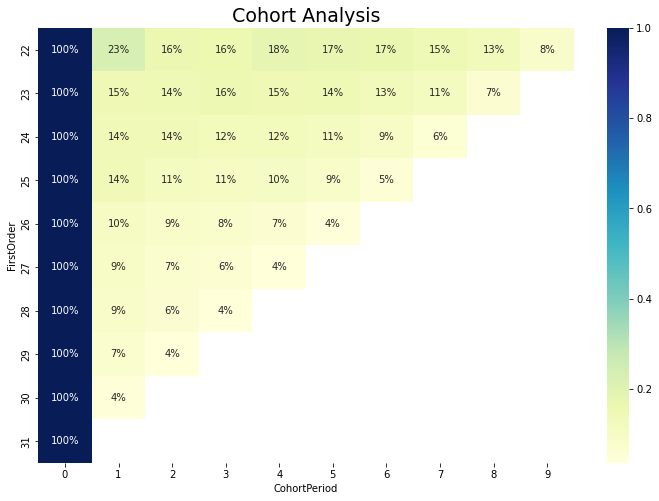

In [124]:
# 주별 재구매율
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%', cmap = 'YlGnBu')
plt.show()

<AxesSubplot:xlabel='CohortPeriod', ylabel='FirstOrder'>

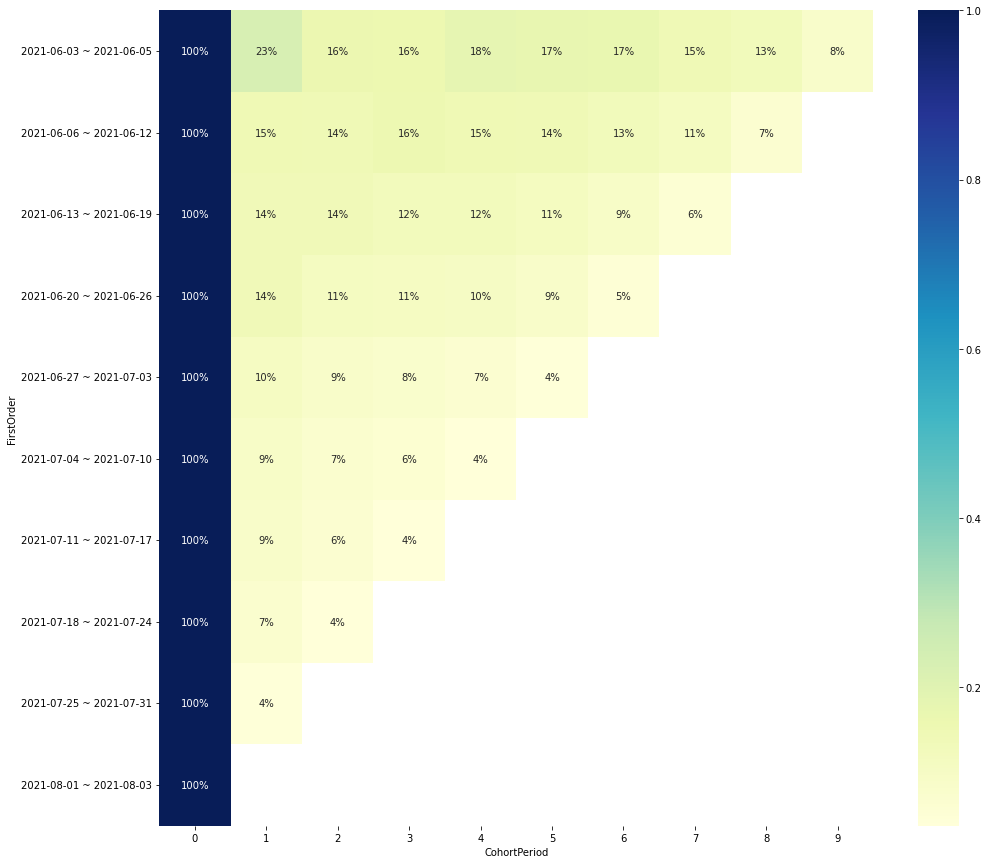

In [125]:
# y축 레이블 교체

plt.figure(figsize = (16, 15))
g = sns.heatmap(user_retention, annot=True, fmt='.0%', cmap = 'YlGnBu')
g.set_yticklabels(['2021-06-03 ~ 2021-06-05',
               '2021-06-06 ~ 2021-06-12',
               '2021-06-13 ~ 2021-06-19',
               '2021-06-20 ~ 2021-06-26',
               '2021-06-27 ~ 2021-07-03',
               '2021-07-04 ~ 2021-07-10',
               '2021-07-11 ~ 2021-07-17',
               '2021-07-18 ~ 2021-07-24',
               '2021-07-25 ~ 2021-07-31',
               '2021-08-01 ~ 2021-08-03'], rotation = 360)

g

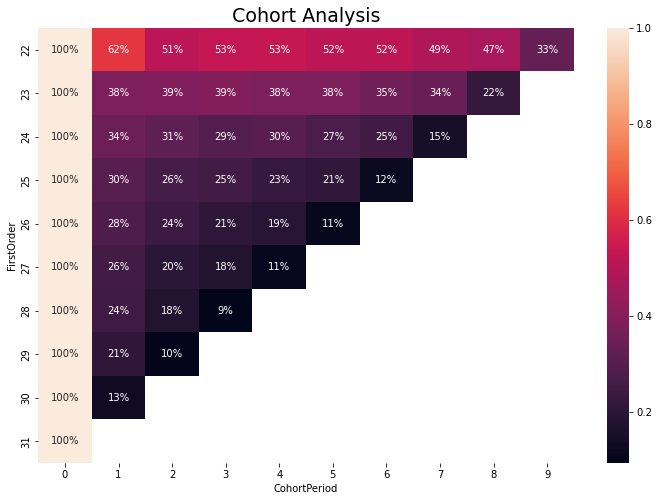

In [127]:
# 주별 재방문율

cohort = df.set_index('user_no')
cohort = cohort[cohort['event_name'] == 'click_item']
cohort['event_timestamp'] = cohort['event_timestamp'].astype('datetime64')

cohort['date'] = cohort['event_timestamp'].apply(lambda x: x.strftime('%Y-%m-%d'))
cohort['date'] = cohort['date'].astype('datetime64')
cohort['OrderPeriod'] = cohort['event_timestamp'].apply(lambda x: x.strftime('%U'))


FirstOrder=cohort.groupby(cohort.index)['date'].min()

FirstOrder=FirstOrder.dt.strftime('%U')

cohort['FirstOrder']=FirstOrder
cohort.reset_index(inplace=True)

grouped = cohort.groupby(['FirstOrder', 'OrderPeriod'])

cohorts=grouped['user_no'].nunique()

cohorts=cohorts.reset_index()

cohorts.rename({'user_no':'totalusers'},axis=1,inplace=True)

each_period=cohorts['FirstOrder'].value_counts().sort_index()

cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

cohorts['CohortPeriod']=cohortperiod

cohorts.set_index(['FirstOrder','CohortPeriod'],inplace=True)

cohorts=cohorts['totalusers'].unstack(1)

user_retention=cohorts.divide(cohorts[0],axis=0)
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%')
plt.show()

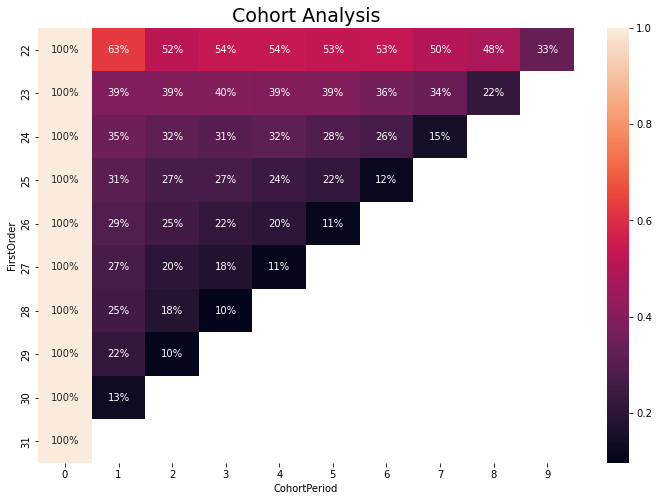

In [131]:
# 29cm 여성 재클릭률
female = df[df['gender'] == 'F']

cohort = female.set_index('user_no')
cohort = cohort[cohort['event_name'] == 'click_item']
cohort['event_timestamp'] = cohort['event_timestamp'].astype('datetime64')

cohort['date'] = cohort['event_timestamp'].apply(lambda x: x.strftime('%Y-%m-%d'))
cohort['date'] = cohort['date'].astype('datetime64')
cohort['OrderPeriod'] = cohort['event_timestamp'].apply(lambda x: x.strftime('%U'))


FirstOrder=cohort.groupby(cohort.index)['date'].min()

FirstOrder=FirstOrder.dt.strftime('%U')

cohort['FirstOrder']=FirstOrder
cohort.reset_index(inplace=True)

grouped = cohort.groupby(['FirstOrder', 'OrderPeriod'])

cohorts=grouped['user_no'].nunique()

cohorts=cohorts.reset_index()

cohorts.rename({'user_no':'totalusers'},axis=1,inplace=True)

each_period=cohorts['FirstOrder'].value_counts().sort_index()

cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

cohorts['CohortPeriod']=cohortperiod

cohorts.set_index(['FirstOrder','CohortPeriod'],inplace=True)

cohorts=cohorts['totalusers'].unstack(1)

user_retention=cohorts.divide(cohorts[0],axis=0)
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%')
plt.show()

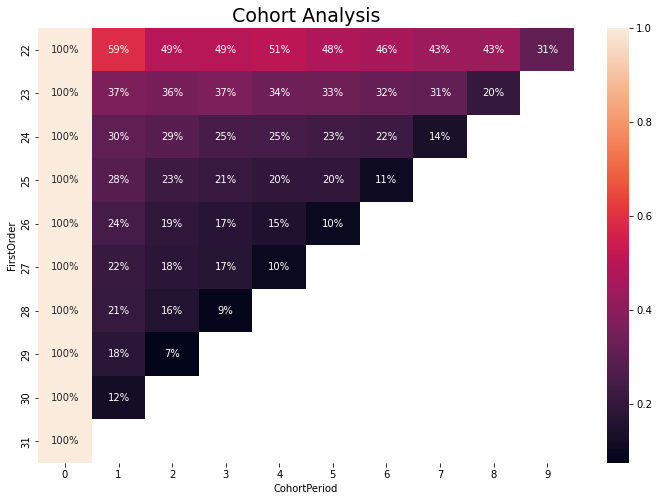

In [132]:
# 29cm 남성 재클릭률

male = df[df['gender'] == 'M']

cohort = male.set_index('user_no')
cohort = cohort[cohort['event_name'] == 'click_item']
cohort['event_timestamp'] = cohort['event_timestamp'].astype('datetime64')

cohort['date'] = cohort['event_timestamp'].apply(lambda x: x.strftime('%Y-%m-%d'))
cohort['date'] = cohort['date'].astype('datetime64')
cohort['OrderPeriod'] = cohort['event_timestamp'].apply(lambda x: x.strftime('%U'))


FirstOrder=cohort.groupby(cohort.index)['date'].min()

FirstOrder=FirstOrder.dt.strftime('%U')

cohort['FirstOrder']=FirstOrder
cohort.reset_index(inplace=True)

grouped = cohort.groupby(['FirstOrder', 'OrderPeriod'])

cohorts=grouped['user_no'].nunique()

cohorts=cohorts.reset_index()

cohorts.rename({'user_no':'totalusers'},axis=1,inplace=True)

each_period=cohorts['FirstOrder'].value_counts().sort_index()

cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

cohorts['CohortPeriod']=cohortperiod

cohorts.set_index(['FirstOrder','CohortPeriod'],inplace=True)

cohorts=cohorts['totalusers'].unstack(1)

user_retention=cohorts.divide(cohorts[0],axis=0)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%')
plt.show()

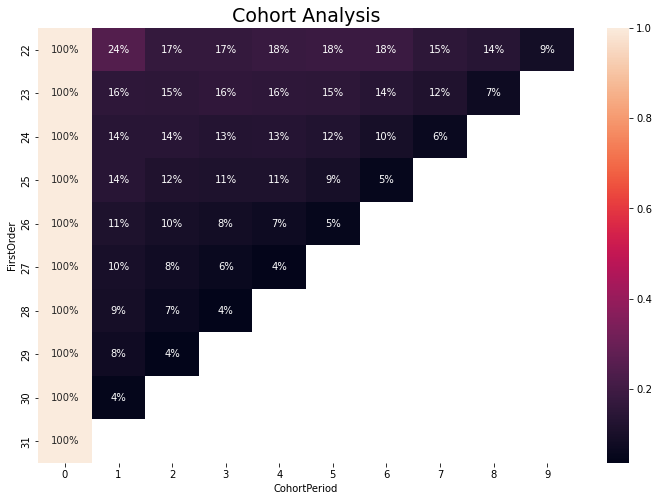

In [133]:
# 29cm 여성 재구매률

cohort = female.set_index('user_no')
cohort = cohort[cohort['event_name'] == 'purchase_success']
cohort['event_timestamp'] = cohort['event_timestamp'].astype('datetime64')

cohort['date'] = cohort['event_timestamp'].apply(lambda x: x.strftime('%Y-%m-%d'))
cohort['date'] = cohort['date'].astype('datetime64')
cohort['OrderPeriod'] = cohort['event_timestamp'].apply(lambda x: x.strftime('%U'))


FirstOrder=cohort.groupby(cohort.index)['date'].min()

FirstOrder=FirstOrder.dt.strftime('%U')

cohort['FirstOrder']=FirstOrder
cohort.reset_index(inplace=True)

grouped = cohort.groupby(['FirstOrder', 'OrderPeriod'])

cohorts=grouped['user_no'].nunique()

cohorts=cohorts.reset_index()

cohorts.rename({'user_no':'totalusers'},axis=1,inplace=True)

each_period=cohorts['FirstOrder'].value_counts().sort_index()

cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

cohorts['CohortPeriod']=cohortperiod

cohorts.set_index(['FirstOrder','CohortPeriod'],inplace=True)

cohorts=cohorts['totalusers'].unstack(1)

user_retention=cohorts.divide(cohorts[0],axis=0)
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%')
plt.show()

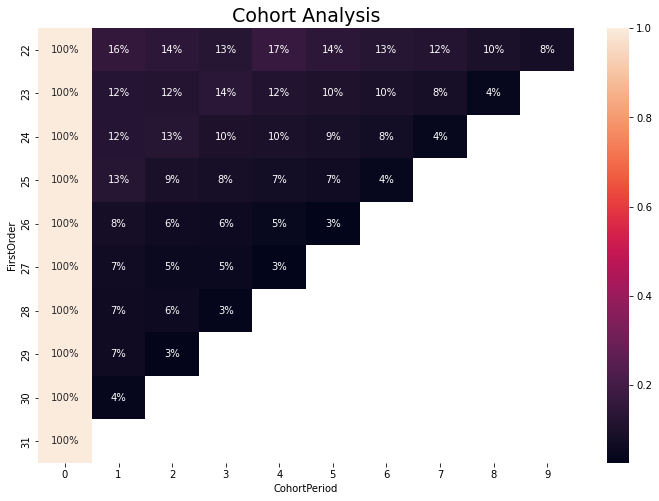

In [134]:
# 29cm 남성 재구매률

cohort = male.set_index('user_no')
cohort = cohort[cohort['event_name'] == 'purchase_success']
cohort['event_timestamp'] = cohort['event_timestamp'].astype('datetime64')

cohort['date'] = cohort['event_timestamp'].apply(lambda x: x.strftime('%Y-%m-%d'))
cohort['date'] = cohort['date'].astype('datetime64')
cohort['OrderPeriod'] = cohort['event_timestamp'].apply(lambda x: x.strftime('%U'))


FirstOrder=cohort.groupby(cohort.index)['date'].min()

FirstOrder=FirstOrder.dt.strftime('%U')

cohort['FirstOrder']=FirstOrder
cohort.reset_index(inplace=True)

grouped = cohort.groupby(['FirstOrder', 'OrderPeriod'])

cohorts=grouped['user_no'].nunique()

cohorts=cohorts.reset_index()

cohorts.rename({'user_no':'totalusers'},axis=1,inplace=True)

each_period=cohorts['FirstOrder'].value_counts().sort_index()

cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

cohorts['CohortPeriod']=cohortperiod

cohorts.set_index(['FirstOrder','CohortPeriod'],inplace=True)

cohorts=cohorts['totalusers'].unstack(1)

user_retention=cohorts.divide(cohorts[0],axis=0)
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%')
plt.show()

In [158]:
cohort = df.set_index('user_no')
cohort = cohort[cohort['event_name'] == 'purchase_success']
cohort['event_timestamp'] = cohort['event_timestamp'].astype('datetime64')

cohort['OrderPeriod'] = cohort['event_timestamp'].apply(lambda x: x.strftime('%U'))
cohort.head()


,gender,event_timestamp,event_name,region,item_name,price,category1_name,category2_name,category3_name,brand_name,age,event_time_month,event_time_weekday,event_time_hour,event_time_day,OrderPeriod
user_no,,,,,,,,,,,,,,,,
1kIJhRaXDdF81CGqQYjwwQ==,F,2021-06-18 00:23:47.411004,purchase_success,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,20대,6월,금요일,0시,18일,24
xkVLwpz+3FLGrdRw2r6QBg==,F,2021-07-10 15:18:01.394040,purchase_success,인천광역시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,20대,7월,토요일,15시,10일,27
xkVLwpz+3FLGrdRw2r6QBg==,F,2021-07-10 15:18:13.290007,purchase_success,인천광역시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,20대,7월,토요일,15시,10일,27
26MW6xtO8djid+6UqXOYPA==,F,2021-06-17 22:42:03.406004,purchase_success,서울특별시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,40대,6월,목요일,22시,17일,24
MXojfALE3l6GpUZ1ZIQ87w==,F,2021-06-17 22:22:00.286004,purchase_success,서울특별시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,6월,목요일,22시,17일,24


In [159]:
# retention curve 만들기
# cohort.set_index('user_no', inplace=True)

# 고객 각각의 첫 구매기간 추출
cohort['CohortGroup'] = cohort.groupby(level=0)['event_timestamp'].min().apply(lambda x: x.strftime('%U'))
cohort.reset_index(inplace=True)
cohort.head()

,user_no,gender,event_timestamp,event_name,region,item_name,price,category1_name,category2_name,category3_name,brand_name,age,event_time_month,event_time_weekday,event_time_hour,event_time_day,OrderPeriod,CohortGroup
0,1kIJhRaXDdF81CGqQYjwwQ==,F,2021-06-18 00:23:47.411004,purchase_success,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,20대,6월,금요일,0시,18일,24,22
1,xkVLwpz+3FLGrdRw2r6QBg==,F,2021-07-10 15:18:01.394040,purchase_success,인천광역시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,20대,7월,토요일,15시,10일,27,23
2,xkVLwpz+3FLGrdRw2r6QBg==,F,2021-07-10 15:18:13.290007,purchase_success,인천광역시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,20대,7월,토요일,15시,10일,27,23
3,26MW6xtO8djid+6UqXOYPA==,F,2021-06-17 22:42:03.406004,purchase_success,서울특별시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,40대,6월,목요일,22시,17일,24,24
4,MXojfALE3l6GpUZ1ZIQ87w==,F,2021-06-17 22:22:00.286004,purchase_success,서울특별시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,6월,목요일,22시,17일,24,22


In [160]:
grouped = cohort.groupby(['CohortGroup', 'OrderPeriod'])

cohorts = grouped.agg({'user_no': pd.Series.nunique, # DISTINCT COUNT 
                       'price': np.sum}) # SUM 
                       
cohorts.rename(columns={'user_no': 'TotalUsers'}, inplace=True)
cohorts.head()

TotalUsers        price
CohortGroup OrderPeriod                         
22          22                 7486  857387819.0
            23                 1690  276472045.0
            24                 1220  200611700.0
            25                 1198  170859690.0
            26                 1343  228923190.0

In [161]:
# Label the CohortPeriod for each CohortGroup

def cohort_period(cohort):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    cohort['CohortPeriod'] = np.arange(len(cohort)) + 1
    return cohort

In [162]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers        price  CohortPeriod
CohortGroup OrderPeriod                                       
22          22                 7486  857387819.0             1
            23                 1690  276472045.0             2
            24                 1220  200611700.0             3
            25                 1198  170859690.0             4
            26                 1343  228923190.0             5

In [163]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
22     7486
23    21651
24    14934
25    14245
26    17089
Name: TotalUsers, dtype: int64

In [164]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,22,23,24,25,26,27,28,29,30,31
CohortPeriod,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.225755,0.148677,0.136601,0.136890,0.104453,0.091972,0.085851,0.073780,0.043057,NaN
3,0.162971,0.143966,0.136199,0.111197,0.087249,0.071719,0.064084,0.036521,NaN,NaN
4,0.160032,0.155282,0.123477,0.107336,0.077301,0.059379,0.036144,NaN,NaN,NaN
5,0.179402,0.148353,0.123142,0.103194,0.065949,0.037311,NaN,NaN,NaN,NaN
6,0.174860,0.141749,0.112093,0.087750,0.041664,NaN,NaN,NaN,NaN,NaN
7,0.171520,0.127846,0.090733,0.048789,NaN,NaN,NaN,NaN,NaN,NaN
8,0.145204,0.110526,0.056515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.128907,0.065401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


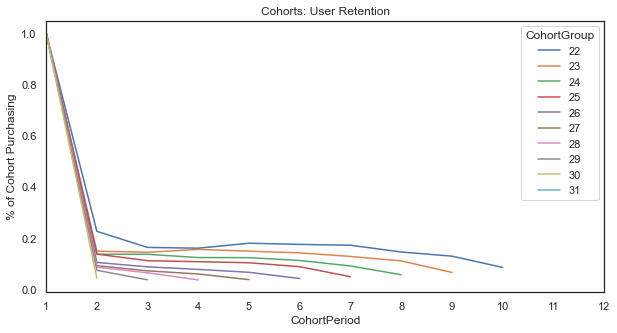

In [165]:
user_retention.plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

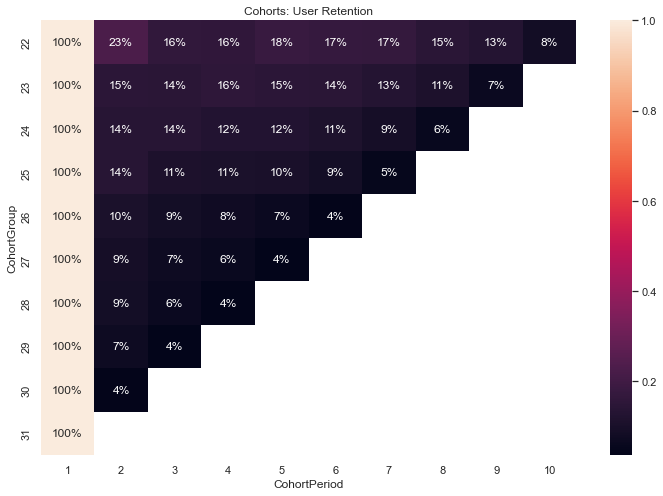

In [166]:
# Creating heatmaps in matplotlib is more difficult than it should be.
# Thankfully, Seaborn makes them easy for us.
# http://stanford.edu/~mwaskom/software/seaborn/

import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

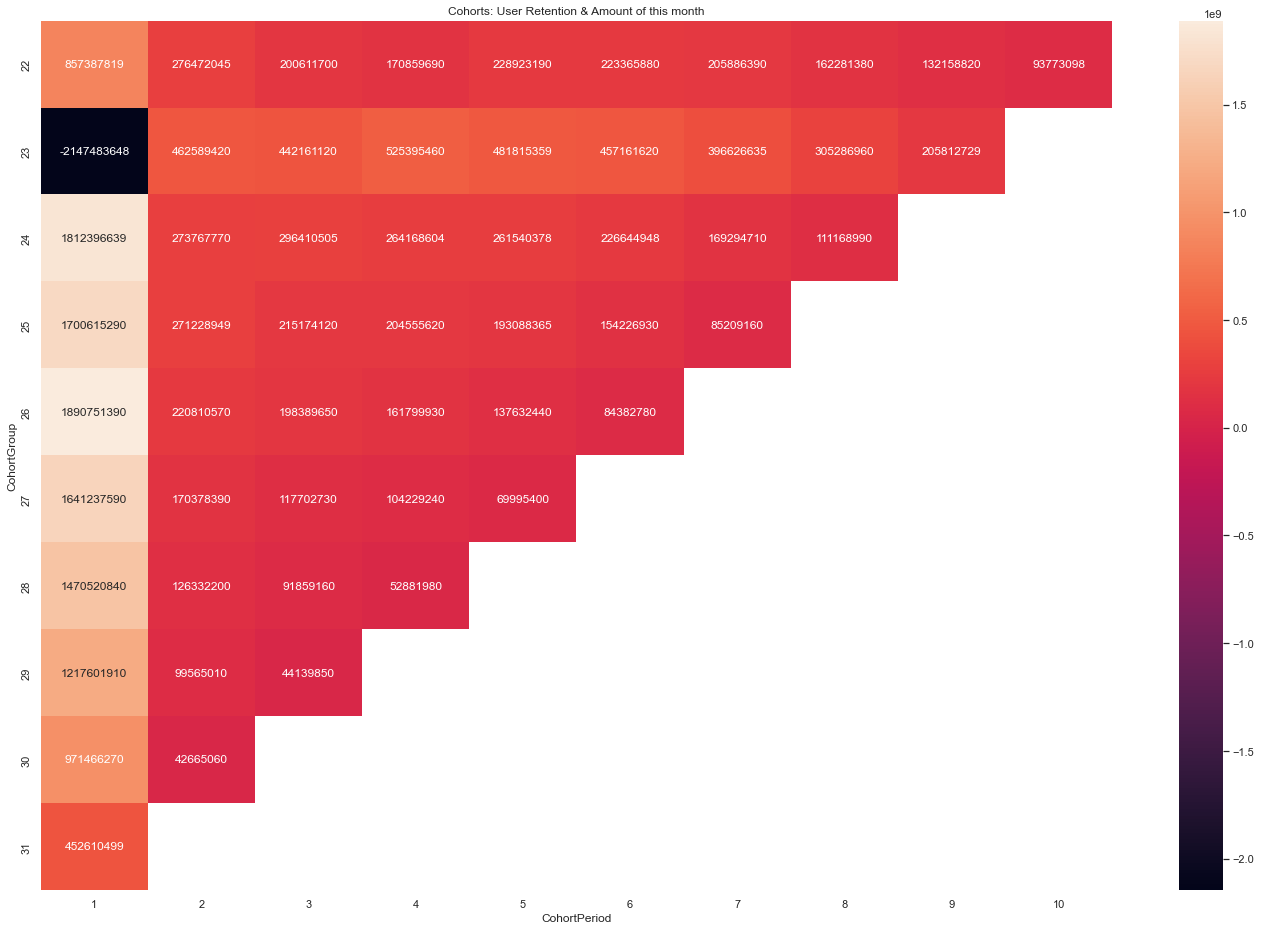

In [167]:
sns.set(style='white')

plt.figure(figsize=(24, 16))
plt.title('Cohorts: User Retention & Amount of this month')
sns.heatmap(cohorts['price'].unstack(0).T.fillna(0).astype('int'), mask=user_retention.T.isnull(), annot=True, fmt= '0');

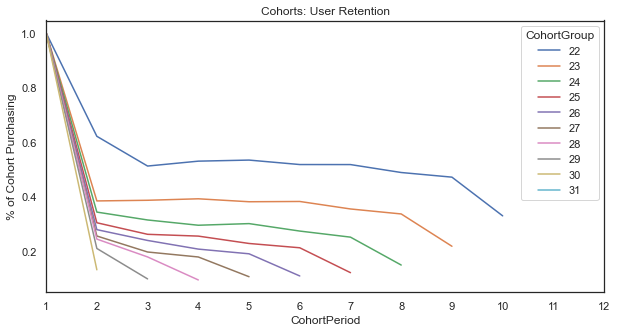

In [168]:
#주별 Retention Curve

cohort = df.set_index('user_no')
cohort = cohort[cohort['event_name'] == 'click_item']
cohort['event_timestamp'] = cohort['event_timestamp'].astype('datetime64')

cohort['OrderPeriod'] = cohort['event_timestamp'].apply(lambda x: x.strftime('%U'))

cohort['CohortGroup'] = cohort.groupby(level=0)['event_timestamp'].min().apply(lambda x: x.strftime('%U'))
cohort.reset_index(inplace=True)

grouped = cohort.groupby(['CohortGroup', 'OrderPeriod'])

cohorts = grouped.agg({'user_no': pd.Series.nunique, # DISTINCT COUNT 
                       'price': np.sum}) # SUM 
                       
cohorts.rename(columns={'user_no': 'TotalUsers'}, inplace=True)

def cohort_period(cohort):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    cohort['CohortPeriod'] = np.arange(len(cohort)) + 1
    return cohort

cohorts = cohorts.groupby(level=0).apply(cohort_period)

cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()

user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

user_retention.plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

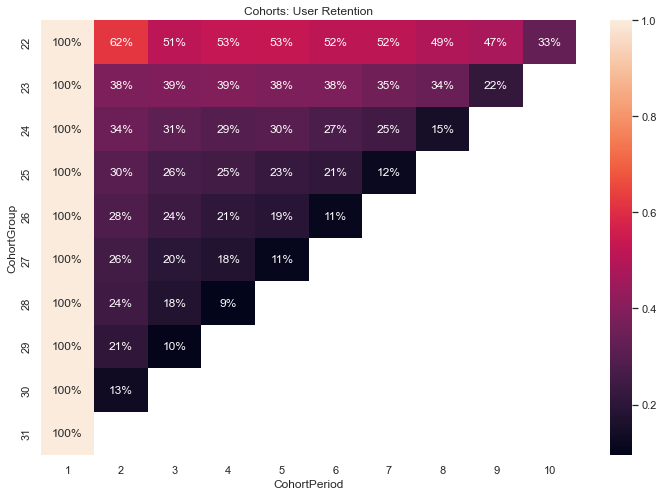

In [169]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

In [171]:
# 카테고리 인기 브랜드 word cloud

from wordcloud  import WordCloud
import matplotlib.pyplot as plt

In [172]:
f_clothing = df[(df['gender'] == 'F') & (df['category1_name'] == '의류')]
f_clothing = f_clothing[f_clothing['event_name'] == 'purchase_success']

In [173]:
L = []

for i in a['brand_name']:
    L.append(i)

In [174]:
from collections import Counter

In [175]:
count = Counter(L)
WORD = dict(count.most_common())
WORD

{'LENINA': 54320,
 'FACADE PATTERN': 50802,
 'THOMASMORE': 48624,
 'ANOTHEROFFICE': 48276,
 'DUNST': 47486,
 "Jo's lounge": 41579,
 'Nothing written': 41357,
 'LE': 40486,
 'URAGO': 36068,
 'Mardi Mercredi': 35133,
 'GROVE': 32759,
 'KINDERSALMON': 30289,
 'MONGDOL': 30207,
 'NEITHERS': 29091,
 'HAE BY HAEKIM': 28097,
 'MORE OR LESS': 24082,
 'BEMUSE MANSION': 23375,
 'LOEIL': 23033,
 'MARITHE FRANCOIS GIRBAUD': 22697,
 '앳코너': 22493,
 'ULLALA PAJAMA': 22473,
 'MOIA': 21861,
 'comfortlab': 21077,
 'ONE BRILLIANT': 20530,
 'clove': 19988,
 'LINGSEOUL': 19735,
 'BLUE BRICK': 18819,
 'Tagtraume': 18657,
 'ENZO BLUES': 18443,
 'SALT-WATER SANDAL': 18421,
 'TENNiS BOY CLUB': 17878,
 'FREITAG': 17870,
 'movewarm': 16194,
 'BRENDA BRENDEN SEOUL': 16026,
 'LOOKAST': 15922,
 'Aeiou': 15496,
 'H8': 15371,
 'Ma Journee': 14933,
 'ENOR': 14920,
 'slow move': 14441,
 'MEDUSE': 14333,
 'CITYBREEZE': 14130,
 'ahwe': 14012,
 'REORG': 13977,
 'lyceenne': 13661,
 'BLANK ROOM': 13459,
 'ANEDIT': 13443,
 '

In [176]:
WORD = {key : value for key, value in WORD.items() if value >= 5}

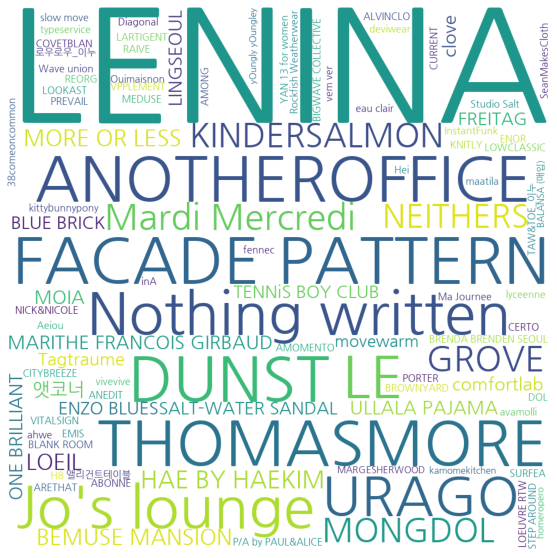

In [177]:
wc = WordCloud(font_path = 'C:/Users/user/Downloads/nanum/NanumGothic.ttf',
             background_color = 'white',
              width = 1000,
              height = 1000,
              max_words = 100,
              max_font_size = 300).generate_from_frequencies(WORD)

plt.figure(figsize = (15, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()


In [10]:
wc.to_file('test.jpg')

In [178]:
# 전환율을 구하지 못했던 이유

drop = df.drop(['event_time_month','event_time_weekday','event_time_weekday','event_time_day'], axis = 1)
drop['Y-m-d'] = drop['event_timestamp'].astype('datetime64').apply(lambda x: x.strftime('%Y-%m-%d'))
drop

,user_no,gender,event_timestamp,event_name,region,item_name,price,category1_name,category2_name,category3_name,brand_name,age,event_time_hour,Y-m-d
0,++MXKfwkOw4VFn9HkVCRrw==,F,2021-07-11 12:54:43.707039,click_item,경상남도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,20대,12시,2021-07-11
1,+IJWJBuH72jPY+6LfW0uDQ==,F,2021-06-27 01:59:24.362031,click_item,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,1시,2021-06-27
2,0qCU5nR0Yp64hIYbtahADQ==,F,2021-06-24 17:51:48.031004,click_item,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,17시,2021-06-24
3,0qCU5nR0Yp64hIYbtahADQ==,F,2021-06-24 17:51:48.031004,click_item,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,17시,2021-06-24
4,0u77zDKAi3S88XuFzXv7Qw==,F,2021-07-11 10:03:32.919019,click_item,서울특별시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,40대,10시,2021-07-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116069,zxJeR7ZbbTSRzhCxlkd4ug==,F,2021-08-03 11:36:01.103016,click_item,경기도,2 STRAP PRINT CHAMBRAY MIX DRESS,233700.0,의류,원피스/점프수트,원피스,Merens,20대,11시,2021-08-03
5116070,zygWFtOw4IuHCzuQzNqjBg==,F,2021-06-20 00:03:18.518020,click_item,부산광역시,[handmade]momo knit bucket_black,55000.0,잡화,모자,버킷햇,EVANCE,30대,0시,2021-06-20
5116071,zygWFtOw4IuHCzuQzNqjBg==,F,2021-06-20 00:03:39.935031,click_item,부산광역시,[슈펜] 울 니트 버킷햇 TPCW20W12,25900.0,잡화,모자,버킷햇,shoopen,30대,0시,2021-06-20
5116072,zzQb08qbNg8VZ+c3wMVhuw==,F,2021-07-29 12:56:49.857068,click_item,서울특별시,캐시미어 혼방 심플 스웨터 ZPZ4ER1902LBL,178000.0,의류,상의,니트/스웨터,OLZEN,50대,12시,2021-07-29


In [179]:
# click_item 보다 purchase_success가 더많이 있는 user_no가 있다
# 멘토링 => 한번에 많이 구매한 user_no가 있다.
# 초단위로 중복제거를 하라고 하셨음

a = df.groupby('user_no')['event_name'].value_counts()
a = a.to_frame()
a

event_name
user_no                  event_name                  
+++T9c17sr6wEYOy9UFv3w== purchase_success           4
                         click_item                 2
                         like_item                  2
                         add_to_cart                1
+++aQH5NnhiU/9qECKk3uQ== click_item                49
...                                               ...
zzwYai1YDr0JZQwaTqc0mQ== click_item                 7
                         purchase_success           1
zzzTNW8escss3zrnpuGMhQ== add_to_cart                1
zzzWx+6Z3L2IRJBTgvBs5g== purchase_success           3
                         click_item                 1

[343309 rows x 1 columns]

In [180]:
# click item 과 puchase success의 연관성이 없다

df[df['user_no'] == 'zzzWx+6Z3L2IRJBTgvBs5g==']

,user_no,gender,event_timestamp,event_name,region,item_name,price,category1_name,category2_name,category3_name,brand_name,age,event_time_month,event_time_weekday,event_time_hour,event_time_day
56434,zzzWx+6Z3L2IRJBTgvBs5g==,M,2021-06-15 17:04:26.206005,purchase_success,서울특별시,21SS Writer Shirt (Clear Sky),87000.0,의류,상의,셔츠/블라우스,ANOTHEROFFICE,20대,6월,화요일,17시,15일
336034,zzzWx+6Z3L2IRJBTgvBs5g==,M,2021-07-02 23:13:04.460014,click_item,인천광역시,21SS Study Denim Type 4 (Stone Wash),138000.0,의류,하의,청바지,ANOTHEROFFICE,20대,7월,금요일,23시,2일
579908,zzzWx+6Z3L2IRJBTgvBs5g==,M,2021-06-15 17:04:26.205004,purchase_success,서울특별시,21SS Writer Shirt (Dove Gray),87000.0,의류,상의,셔츠/블라우스,ANOTHEROFFICE,20대,6월,화요일,17시,15일
2425965,zzzWx+6Z3L2IRJBTgvBs5g==,M,2021-07-04 00:25:00.662004,purchase_success,인천광역시,Half Sleeved Collar Knit (Olive Khaki),69000.0,의류,상의,니트/스웨터,Steady Every Wear,20대,7월,일요일,0시,4일


In [181]:
df[df['user_no'] == '+++T9c17sr6wEYOy9UFv3w==']

,user_no,gender,event_timestamp,event_name,region,item_name,price,category1_name,category2_name,category3_name,brand_name,age,event_time_month,event_time_weekday,event_time_hour,event_time_day
190328,+++T9c17sr6wEYOy9UFv3w==,M,2021-07-08 07:28:24.907000,like_item,서울특별시,벨리에 와이드 립 니티드 베스트 - 차콜 그레이,79000.0,의류,상의,니트/스웨터,BELIER,30대,7월,목요일,7시,8일
654298,+++T9c17sr6wEYOy9UFv3w==,M,2021-06-15 16:07:45.863056,purchase_success,서울특별시,앨빈클로 마운틴 클라이머 오버핏 반팔티 AST3863 (3 COLOR),33900.0,의류,상의,티셔츠,ALVINCLO,30대,6월,화요일,16시,15일
1000079,+++T9c17sr6wEYOy9UFv3w==,M,2021-07-03 17:51:26.438050,purchase_success,서울특별시,[1+1]앨빈클로 캠핑 피그먼트 반팔티+팬츠 패키지,65800.0,의류,상의,티셔츠,ALVINCLO,30대,7월,토요일,17시,3일
1911799,+++T9c17sr6wEYOy9UFv3w==,M,2021-06-17 18:55:12.949015,purchase_success,서울특별시,CITY BOYS HELMET BAG M / L,119000.0,잡화,가방,크로스백,sweetch,30대,6월,목요일,18시,17일
2165835,+++T9c17sr6wEYOy9UFv3w==,M,2021-06-16 15:27:03.492053,purchase_success,서울특별시,[더블유브이프로젝트] 할로우 밴딩 쿨 크롭팬츠 2pack CJLP7378,55800.0,의류,하의,바지,WV PROJECT,30대,6월,수요일,15시,16일
3321257,+++T9c17sr6wEYOy9UFv3w==,M,2021-06-19 19:37:25.275026,click_item,서울특별시,폴로 랄프 로렌 코튼 샴브레이 셔츠 (WMPOSHTN6820185),179000.0,의류,상의,셔츠/블라우스,POLO RALPH LAUREN,30대,6월,토요일,19시,19일
3360680,+++T9c17sr6wEYOy9UFv3w==,M,2021-06-16 15:27:52.842043,click_item,서울특별시,폴로 랄프 로렌 The Earth Polo (MNPOKNI1N820663),169000.0,의류,상의,티셔츠,POLO RALPH LAUREN,30대,6월,수요일,15시,16일
3552603,+++T9c17sr6wEYOy9UFv3w==,M,2021-06-19 19:38:20.229043,add_to_cart,서울특별시,폴로 랄프 로렌 커스텀핏 샴브레이 셔츠 (MNPOWOV16820448),179000.0,의류,상의,셔츠/블라우스,POLO RALPH LAUREN,30대,6월,토요일,19시,19일
4667334,+++T9c17sr6wEYOy9UFv3w==,M,2021-07-13 17:10:14.950001,like_item,서울특별시,21SS 트리컬러 폭스 패치 카라티_AM00200KJ7002_GREY MELANGE,109000.0,의류,상의,티셔츠,MAISON KITSUNE(매입),30대,7월,화요일,17시,13일


In [182]:
# 초단위로 중복제거 시도

df['event_timestamp'] = df['event_timestamp'].astype('datetime64')
df['datetime'] = df['event_timestamp'].apply(lambda x : x.strftime('%Y-%m-%d %H:%M:%S'))
df

,user_no,gender,event_timestamp,event_name,region,item_name,price,category1_name,category2_name,category3_name,brand_name,age,event_time_month,event_time_weekday,event_time_hour,event_time_day,datetime
0,++MXKfwkOw4VFn9HkVCRrw==,F,2021-07-11 12:54:43.707039,click_item,경상남도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,20대,7월,일요일,12시,11일,2021-07-11 12:54:43
1,+IJWJBuH72jPY+6LfW0uDQ==,F,2021-06-27 01:59:24.362031,click_item,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,6월,일요일,1시,27일,2021-06-27 01:59:24
2,0qCU5nR0Yp64hIYbtahADQ==,F,2021-06-24 17:51:48.031004,click_item,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,6월,목요일,17시,24일,2021-06-24 17:51:48
3,0qCU5nR0Yp64hIYbtahADQ==,F,2021-06-24 17:51:48.031004,click_item,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,6월,목요일,17시,24일,2021-06-24 17:51:48
4,0u77zDKAi3S88XuFzXv7Qw==,F,2021-07-11 10:03:32.919019,click_item,서울특별시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,40대,7월,일요일,10시,11일,2021-07-11 10:03:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116069,zxJeR7ZbbTSRzhCxlkd4ug==,F,2021-08-03 11:36:01.103016,click_item,경기도,2 STRAP PRINT CHAMBRAY MIX DRESS,233700.0,의류,원피스/점프수트,원피스,Merens,20대,8월,화요일,11시,3일,2021-08-03 11:36:01
5116070,zygWFtOw4IuHCzuQzNqjBg==,F,2021-06-20 00:03:18.518020,click_item,부산광역시,[handmade]momo knit bucket_black,55000.0,잡화,모자,버킷햇,EVANCE,30대,6월,일요일,0시,20일,2021-06-20 00:03:18
5116071,zygWFtOw4IuHCzuQzNqjBg==,F,2021-06-20 00:03:39.935031,click_item,부산광역시,[슈펜] 울 니트 버킷햇 TPCW20W12,25900.0,잡화,모자,버킷햇,shoopen,30대,6월,일요일,0시,20일,2021-06-20 00:03:39
5116072,zzQb08qbNg8VZ+c3wMVhuw==,F,2021-07-29 12:56:49.857068,click_item,서울특별시,캐시미어 혼방 심플 스웨터 ZPZ4ER1902LBL,178000.0,의류,상의,니트/스웨터,OLZEN,50대,7월,목요일,12시,29일,2021-07-29 12:56:49


In [185]:
a = df.drop_duplicates(['user_no', 'event_name', 'datetime'])

In [186]:
w = pd.crosstab(a.user_no, a.event_name)

In [187]:
# 그래도 존재한다
w

event_name,add_to_cart,click_item,like_item,purchase_success
user_no,,,,
+++T9c17sr6wEYOy9UFv3w==,1,2,2,4
+++aQH5NnhiU/9qECKk3uQ==,0,49,0,2
++0bwiYVJ/TAsCpxI4UCuw==,0,50,5,1
++1HN9s1imztN8ftPCt3LA==,0,0,0,1
++292nTvV+bCI1Diuw96GA==,0,1,0,0
...,...,...,...,...
zzwOfX9q6MNyni9Ff8Ws6A==,0,16,0,0
zzwQnhNQeYnzcsjywnIh3g==,0,3,0,0
zzwYai1YDr0JZQwaTqc0mQ==,0,7,0,1


In [188]:
w[w['click_item'] < w['purchase_success']]

event_name,add_to_cart,click_item,like_item,purchase_success
user_no,,,,
+++T9c17sr6wEYOy9UFv3w==,1,2,2,4
++1HN9s1imztN8ftPCt3LA==,0,0,0,1
++2c5Jr8sOEvXXs326kLYQ==,0,0,0,1
++LUTYwBI8vsEkMdpal0sA==,0,0,0,1
++PfIvhO7kYxyzoiSRl6Wg==,0,0,0,1
...,...,...,...,...
zzYkirUgt47YWvQ6uLkmPA==,1,0,0,1
zzfSkntBwAhcDQgf6A9hOA==,0,0,0,1
zzntF+g7DRVrgfImEIEWyQ==,0,0,0,1


In [189]:
# CTR을 구하였지만 신뢰 할수 없다고 판단

p = a[a['category1_name'] == '컬처']
p = p[(p['event_name'] == 'click_item') | (p['event_name'] == 'purchase_success')]

a = pd.crosstab(index = [p.gender, p.age] ,
            columns =  p.event_name
           )

a['click_purchase_rate'] = round(a['purchase_success'] / a['click_item'],2)
a


event_name  click_item  purchase_success  click_purchase_rate
gender age                                                   
F      10대         286                77                 0.27
       20대        4785              2438                 0.51
       30대        4095              1927                 0.47
       40대        1391               471                 0.34
       50대         306                93                 0.30
       60대          48                 8                 0.17
M      10대          41                 6                 0.15
       20대         582               411                 0.71
       30대         480               372                 0.78
       40대         169                91                 0.54
       50대          35                15                 0.43
       60대          28                 7                 0.25

In [190]:
# 외부 사이트에서 바로 들어와 구매한 고객이라고 판단
# cilck 후 바로 purchase_success한 user_no는 사이트에 내에서 구매한 것으로 판단
#사이트 내에서 구매한 사람만 CTR구하기로 결정

df['event_timestamp'] = df['event_timestamp'].astype('datetime64')
df['datetime'] = df['event_timestamp'].apply(lambda x : x.strftime('%Y-%m-%d %H:%M:%S'))
df

,user_no,gender,event_timestamp,event_name,region,item_name,price,category1_name,category2_name,category3_name,brand_name,age,event_time_month,event_time_weekday,event_time_hour,event_time_day,datetime
0,++MXKfwkOw4VFn9HkVCRrw==,F,2021-07-11 12:54:43.707039,click_item,경상남도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,20대,7월,일요일,12시,11일,2021-07-11 12:54:43
1,+IJWJBuH72jPY+6LfW0uDQ==,F,2021-06-27 01:59:24.362031,click_item,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,6월,일요일,1시,27일,2021-06-27 01:59:24
2,0qCU5nR0Yp64hIYbtahADQ==,F,2021-06-24 17:51:48.031004,click_item,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,6월,목요일,17시,24일,2021-06-24 17:51:48
3,0qCU5nR0Yp64hIYbtahADQ==,F,2021-06-24 17:51:48.031004,click_item,경기도,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,30대,6월,목요일,17시,24일,2021-06-24 17:51:48
4,0u77zDKAi3S88XuFzXv7Qw==,F,2021-07-11 10:03:32.919019,click_item,서울특별시,Linen embroidery cardigan - Black,148000.0,의류,상의,카디건,BEMUSE MANSION,40대,7월,일요일,10시,11일,2021-07-11 10:03:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116069,zxJeR7ZbbTSRzhCxlkd4ug==,F,2021-08-03 11:36:01.103016,click_item,경기도,2 STRAP PRINT CHAMBRAY MIX DRESS,233700.0,의류,원피스/점프수트,원피스,Merens,20대,8월,화요일,11시,3일,2021-08-03 11:36:01
5116070,zygWFtOw4IuHCzuQzNqjBg==,F,2021-06-20 00:03:18.518020,click_item,부산광역시,[handmade]momo knit bucket_black,55000.0,잡화,모자,버킷햇,EVANCE,30대,6월,일요일,0시,20일,2021-06-20 00:03:18
5116071,zygWFtOw4IuHCzuQzNqjBg==,F,2021-06-20 00:03:39.935031,click_item,부산광역시,[슈펜] 울 니트 버킷햇 TPCW20W12,25900.0,잡화,모자,버킷햇,shoopen,30대,6월,일요일,0시,20일,2021-06-20 00:03:39
5116072,zzQb08qbNg8VZ+c3wMVhuw==,F,2021-07-29 12:56:49.857068,click_item,서울특별시,캐시미어 혼방 심플 스웨터 ZPZ4ER1902LBL,178000.0,의류,상의,니트/스웨터,OLZEN,50대,7월,목요일,12시,29일,2021-07-29 12:56:49


In [191]:
# 시간순으로 정렬
df = df.sort_values('datetime')

In [192]:
df['datetime'] = df['datetime'].astype('datetime64')

In [193]:
df1 = df[['user_no', 'event_name','datetime','item_name']].groupby(['user_no','event_name']).head(5116074)

df2 = df1.sort_values(['user_no', 'datetime'])

df2 = df2.reset_index(drop = True)

In [194]:
df2

,user_no,event_name,datetime,item_name
0,+++T9c17sr6wEYOy9UFv3w==,purchase_success,2021-06-15 16:07:45,앨빈클로 마운틴 클라이머 오버핏 반팔티 AST3863 (3 COLOR)
1,+++T9c17sr6wEYOy9UFv3w==,purchase_success,2021-06-16 15:27:03,[더블유브이프로젝트] 할로우 밴딩 쿨 크롭팬츠 2pack CJLP7378
2,+++T9c17sr6wEYOy9UFv3w==,click_item,2021-06-16 15:27:52,폴로 랄프 로렌 The Earth Polo (MNPOKNI1N820663)
3,+++T9c17sr6wEYOy9UFv3w==,purchase_success,2021-06-17 18:55:12,CITY BOYS HELMET BAG M / L
4,+++T9c17sr6wEYOy9UFv3w==,click_item,2021-06-19 19:37:25,폴로 랄프 로렌 코튼 샴브레이 셔츠 (WMPOSHTN6820185)
...,...,...,...,...
5116069,zzzTNW8escss3zrnpuGMhQ==,add_to_cart,2021-07-07 22:21:50,커먼프로젝트 아킬레스 로우 스니커즈 2257 0547 남성
5116070,zzzWx+6Z3L2IRJBTgvBs5g==,purchase_success,2021-06-15 17:04:26,21SS Writer Shirt (Dove Gray)
5116071,zzzWx+6Z3L2IRJBTgvBs5g==,purchase_success,2021-06-15 17:04:26,21SS Writer Shirt (Clear Sky)
5116072,zzzWx+6Z3L2IRJBTgvBs5g==,click_item,2021-07-02 23:13:04,21SS Study Denim Type 4 (Stone Wash)


In [195]:
df3 = df2[['event_name', 'datetime', 'item_name']][1:]
df3 = df3.rename(columns = {'event_name' : 'next_event_name', 'datetime' : 'next_event_timestamp', 'item_name':'next_item_name'})
df3 = df3.reset_index(drop = True)
df3

,next_event_name,next_event_timestamp,next_item_name
0,purchase_success,2021-06-16 15:27:03,[더블유브이프로젝트] 할로우 밴딩 쿨 크롭팬츠 2pack CJLP7378
1,click_item,2021-06-16 15:27:52,폴로 랄프 로렌 The Earth Polo (MNPOKNI1N820663)
2,purchase_success,2021-06-17 18:55:12,CITY BOYS HELMET BAG M / L
3,click_item,2021-06-19 19:37:25,폴로 랄프 로렌 코튼 샴브레이 셔츠 (WMPOSHTN6820185)
4,add_to_cart,2021-06-19 19:38:20,폴로 랄프 로렌 커스텀핏 샴브레이 셔츠 (MNPOWOV16820448)
...,...,...,...
5116068,add_to_cart,2021-07-07 22:21:50,커먼프로젝트 아킬레스 로우 스니커즈 2257 0547 남성
5116069,purchase_success,2021-06-15 17:04:26,21SS Writer Shirt (Dove Gray)
5116070,purchase_success,2021-06-15 17:04:26,21SS Writer Shirt (Clear Sky)
5116071,click_item,2021-07-02 23:13:04,21SS Study Denim Type 4 (Stone Wash)


In [196]:
df4 = pd.concat([df2[:-1], df3], axis = 1)
df4

,user_no,event_name,datetime,item_name,next_event_name,next_event_timestamp,next_item_name
0,+++T9c17sr6wEYOy9UFv3w==,purchase_success,2021-06-15 16:07:45,앨빈클로 마운틴 클라이머 오버핏 반팔티 AST3863 (3 COLOR),purchase_success,2021-06-16 15:27:03,[더블유브이프로젝트] 할로우 밴딩 쿨 크롭팬츠 2pack CJLP7378
1,+++T9c17sr6wEYOy9UFv3w==,purchase_success,2021-06-16 15:27:03,[더블유브이프로젝트] 할로우 밴딩 쿨 크롭팬츠 2pack CJLP7378,click_item,2021-06-16 15:27:52,폴로 랄프 로렌 The Earth Polo (MNPOKNI1N820663)
2,+++T9c17sr6wEYOy9UFv3w==,click_item,2021-06-16 15:27:52,폴로 랄프 로렌 The Earth Polo (MNPOKNI1N820663),purchase_success,2021-06-17 18:55:12,CITY BOYS HELMET BAG M / L
3,+++T9c17sr6wEYOy9UFv3w==,purchase_success,2021-06-17 18:55:12,CITY BOYS HELMET BAG M / L,click_item,2021-06-19 19:37:25,폴로 랄프 로렌 코튼 샴브레이 셔츠 (WMPOSHTN6820185)
4,+++T9c17sr6wEYOy9UFv3w==,click_item,2021-06-19 19:37:25,폴로 랄프 로렌 코튼 샴브레이 셔츠 (WMPOSHTN6820185),add_to_cart,2021-06-19 19:38:20,폴로 랄프 로렌 커스텀핏 샴브레이 셔츠 (MNPOWOV16820448)
...,...,...,...,...,...,...,...
5116068,zzwYai1YDr0JZQwaTqc0mQ==,click_item,2021-07-28 23:38:57,Hawaii Yacht Club - Ocean blue,add_to_cart,2021-07-07 22:21:50,커먼프로젝트 아킬레스 로우 스니커즈 2257 0547 남성
5116069,zzzTNW8escss3zrnpuGMhQ==,add_to_cart,2021-07-07 22:21:50,커먼프로젝트 아킬레스 로우 스니커즈 2257 0547 남성,purchase_success,2021-06-15 17:04:26,21SS Writer Shirt (Dove Gray)
5116070,zzzWx+6Z3L2IRJBTgvBs5g==,purchase_success,2021-06-15 17:04:26,21SS Writer Shirt (Dove Gray),purchase_success,2021-06-15 17:04:26,21SS Writer Shirt (Clear Sky)
5116071,zzzWx+6Z3L2IRJBTgvBs5g==,purchase_success,2021-06-15 17:04:26,21SS Writer Shirt (Clear Sky),click_item,2021-07-02 23:13:04,21SS Study Denim Type 4 (Stone Wash)


In [197]:
# click item ,  purchae success 의 item_name 이 다르다.
# 너무 다른 data가 많아서 신뢰를 할수 없다고 판단하여 CTR은 구하지 않기로 결정

df5 = df4[(df4['event_name'] == 'click_item') &
          (df4['next_event_name'] == 'purchase_success')]
df5

,user_no,event_name,datetime,item_name,next_event_name,next_event_timestamp,next_item_name
2,+++T9c17sr6wEYOy9UFv3w==,click_item,2021-06-16 15:27:52,폴로 랄프 로렌 The Earth Polo (MNPOKNI1N820663),purchase_success,2021-06-17 18:55:12,CITY BOYS HELMET BAG M / L
26,+++aQH5NnhiU/9qECKk3uQ==,click_item,2021-06-10 05:14:33,WAIST PIN TUCK DRESS L.BEIGE,purchase_success,2021-06-10 05:28:41,OBLONG PLEATED SKIRT - WHITE
36,+++aQH5NnhiU/9qECKk3uQ==,click_item,2021-06-21 20:09:45,벨트 와이드 슬랙스,purchase_success,2021-06-21 20:56:44,플레인 코튼 스커트
112,++0bwiYVJ/TAsCpxI4UCuw==,click_item,2021-07-26 11:16:47,LS READING CLUB T-SHIRT (NAVY),purchase_success,2021-07-27 14:33:20,[Sport] 크루 넥 티셔츠 (129) AFPU2111600-129
115,++0bwiYVJ/TAsCpxI4UCuw==,click_item,2021-07-29 16:13:47,URBAN SOUL(brown),purchase_success,2021-06-10 09:24:07,투명우산 시즌2
...,...,...,...,...,...,...,...
5115953,zzq8skPzbmsxokOi5tkZQQ==,click_item,2021-08-01 08:54:02,scrap no.01 iPhone case,purchase_success,2021-08-01 09:09:00,Knit T-Shirt Black
5115994,zzrBh62TO71nt1GQm+jMjA==,click_item,2021-07-27 17:20:57,DELPY reversible coat_green,purchase_success,2021-07-27 22:25:33,Nova Mini (088) BHSU2010501-088
5116039,zzuJMnncH5Wrn/GUA7nqTg==,click_item,2021-07-23 19:54:40,몽돌 원피스 US 핀턱 카라 원피스 드레스 미니 블랙 MDOP025BLACK,purchase_success,2021-07-23 20:01:48,몽돌 원피스 US 핀턱 카라 원피스 드레스 미니 블랙 MDOP025BLACK
5116060,zzwQnhNQeYnzcsjywnIh3g==,click_item,2021-07-11 15:43:38,Tweed bustier top - Black,purchase_success,2021-07-04 20:40:01,EASY SHORTS (5COLOR)
